# Analyse exploratoire du jeu de données
# "2016 Building Energy Benchmarking" de SEATTLE

## Objectif :
- Comprendre du mieux possible nos données
- Se faire une idée de l'approche pour la sélection des variables

### Analyse de Forme :
- **Variables cible** : <i>SiteEnergyUse(kBtu)</i> et <i>TotalGHGEmissions</i>
- **Lignes et colonnes** : 3376 lignes et 46 colonnes
- **Types de variables** : qualitatives : 16 (dont 1 booléene), quantitatives : 30
- **Valeurs manquantes** :
    - relativement peu de valeurs manquantes : **12.84 %**
    - 2 colonnes "vides" ('Outlier' et 'Comments') comptant pour **4.3% (1/3 des valeurs manquates)**
    - la majorité des valeurs manquantes restantes est concentré sur **6 colonnes**
    - => le jeu de données initial contient donc **38 colonnes "saines"**

### Analyse univariée :
- **Visualisation des variables cibles** :
    - **SiteEnergyUse(kBtu)** : distribution de forme exponentielle (potentiels outliers à analyser de plus près)
    - **TotalGHGEmissions** : distribution de forme exponentielle (potentiels outliers à analyser de plus près)    
    
- **Signification des variables** :
    - **Variables quantitatives** : voir détails de l'analyse univariée plus bas.
    - **Variables qualitatives** : voir détails de l'analyse univariée plus bas.

### Analyse bivariée :
- **Relation Variables / Cibles** :
    - **Variables quantitatives** : on observe une **part importante de corrélation linéaire entre les variables et les valeurs cibles**, et pour les mêmes variables dans des proportions similaires. Cela nous amène à nous demander si nos valeurs cibles ne sont pas elle-mêmes corrélées linéairement. Pour plus de détails, voir le rapport de l'analyse bivariée correspondante plus bas.
    - **Variables qualitatives** : Voir le rapport de l'analyse bivariée correspondante plus bas.
    
    
### Analyse multivariée

- **Relation Variables / Variables** :
   - Nous pouvons identifier **3 principaux clusters de variables fortemment corrélées linéairement entre elles** : il conviendra d'en faire la synthèses avant d'appliquer nos modèles de Machine Learning sur le jeu de données.
   - Nous avons ici la confirmation que **nos valeurs cibles sont bel et bien fortement corrélées linéairement** : la problématique énoncée comme double dans l'énoncé de mission (consommation d'énergie + CO2) semble se simplifier.

### Importation des données et librairires utiles

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display

from pathlib import Path

import missingno as msno
import FETCH_LOAD_DATAS
import ACP_functions

In [2]:
# Fonction à n'appeler qu'à la première ouverture du notebook.
# supprimer cette cellule ensuite ou passer son contenu en commentaire à l'aide de la commande "Ctrl+/""

#FETCH_LOAD_DATAS.fetch_seattle_data()


In [4]:
data = FETCH_LOAD_DATAS.load_seattle_data()

In [5]:
df = data.copy()

##### Paramètres généraux d'affichage et fonction de sauvegarde des visualisations

In [6]:
pd.set_option('display.max_row', 50)
pd.set_option('display.max_column', 50)

In [7]:
IMAGES_PATH = Path() / "img" / "exploration"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)
ID_FIG = 0

def save_fig(fig_title, resolution=300):
    fig_id = str(globals()['ID_FIG'])
    path = IMAGES_PATH / f"exploration - {fig_id} - {fig_title}.png"
    globals()['ID_FIG']+=1
    plt.savefig(path, format='png', dpi=resolution)

In [8]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [10]:
df.dtypes.value_counts()

float64    22
object     15
int64       8
bool        1
dtype: int64

In [11]:
df.isna().mean().mean()

0.12847723057902327

###### Définition des variables pour les valeurs cibles

In [12]:
conso = 'SiteEnergyUse(kBtu)'
co2 = 'TotalGHGEmissions'

### Analyse de Forme

In [13]:
df.shape

(3376, 46)

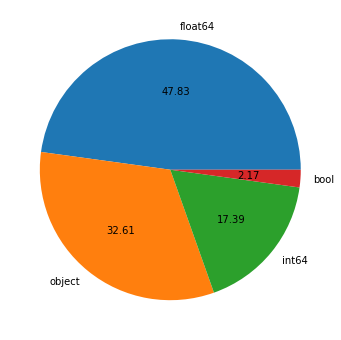

In [14]:
plt.figure(figsize=(6,6))
plt.pie(df.dtypes.value_counts(), autopct="%.2f", labels=df.dtypes.value_counts().index)
save_fig("Proportion initiale des différentes types de donnée dans le jeu")

In [15]:
data.isna().mean().mean()

0.12847723057902327

In [16]:
df.isna().mean().sort_values(ascending=True)

OSEBuildingID                      0.000000
PropertyGFABuilding(s)             0.000000
PropertyGFAParking                 0.000000
PropertyGFATotal                   0.000000
NumberofFloors                     0.000000
YearBuilt                          0.000000
Longitude                          0.000000
Latitude                           0.000000
Neighborhood                       0.000000
DefaultData                        0.000000
CouncilDistrictCode                0.000000
ComplianceStatus                   0.000000
State                              0.000000
City                               0.000000
Address                            0.000000
PropertyName                       0.000000
PrimaryPropertyType                0.000000
BuildingType                       0.000000
DataYear                           0.000000
TaxParcelIdentificationNumber      0.000000
SiteEnergyUse(kBtu)                0.001481
SiteEnergyUseWN(kBtu)              0.001777
SiteEUIWN(kBtu/sf)              

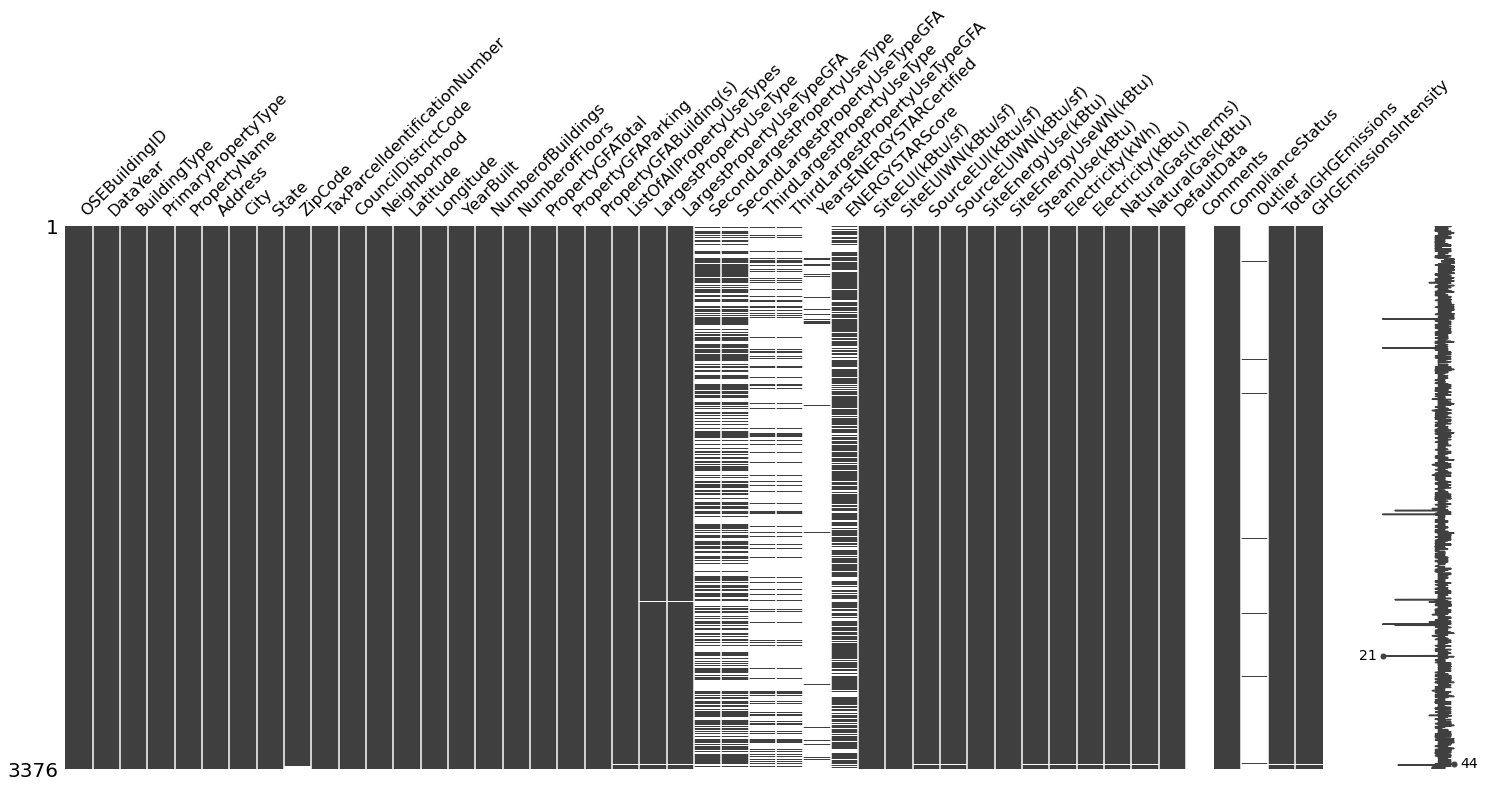

In [17]:
msno.matrix(data)
save_fig("Matrice de remplissage du jeu de données initial")

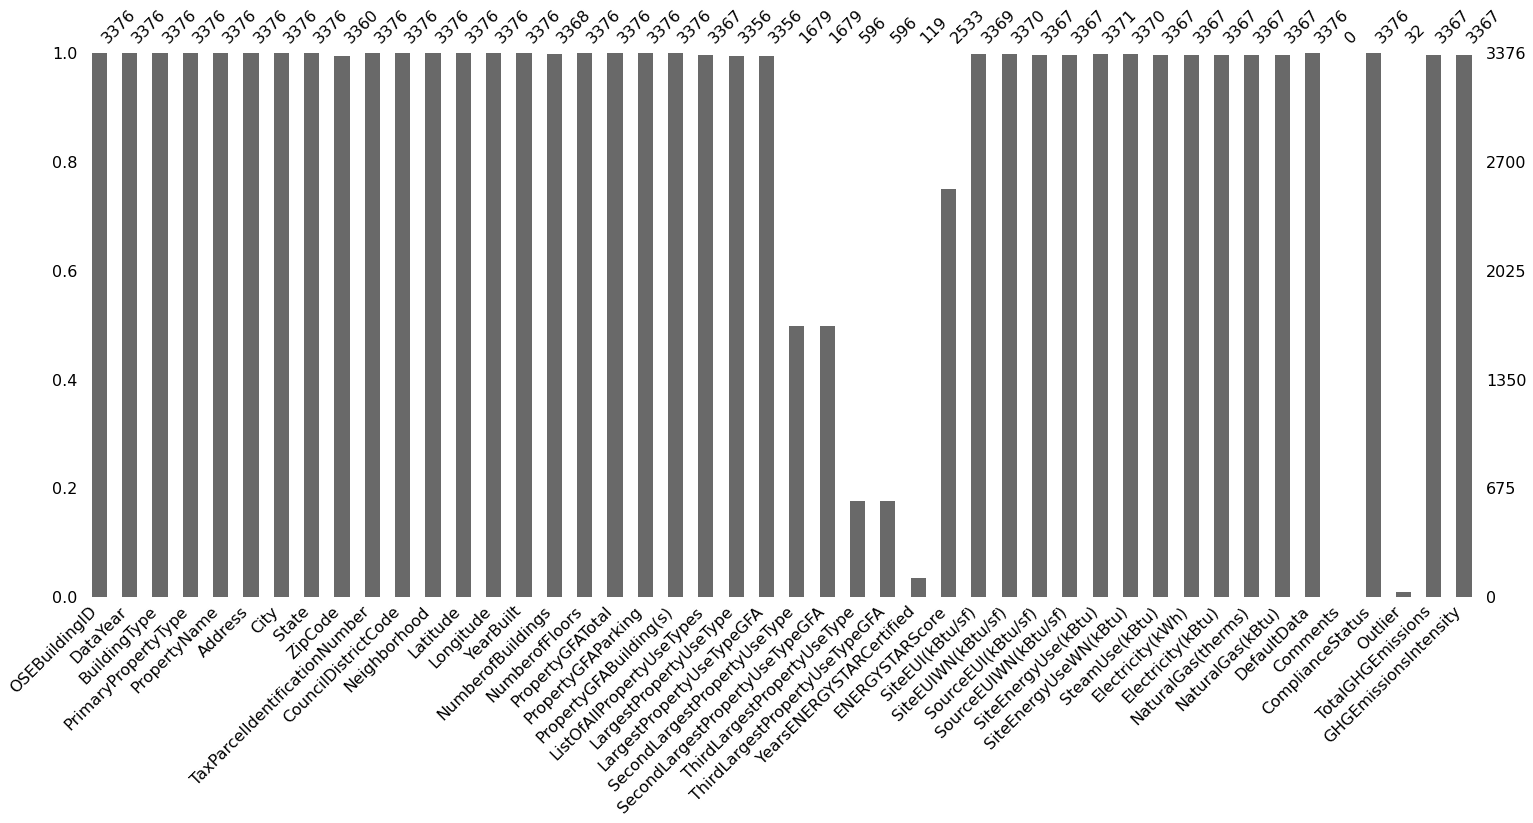

In [18]:
msno.bar(data)
save_fig("Diagramme à barres du remplissage du jeu de données initial")

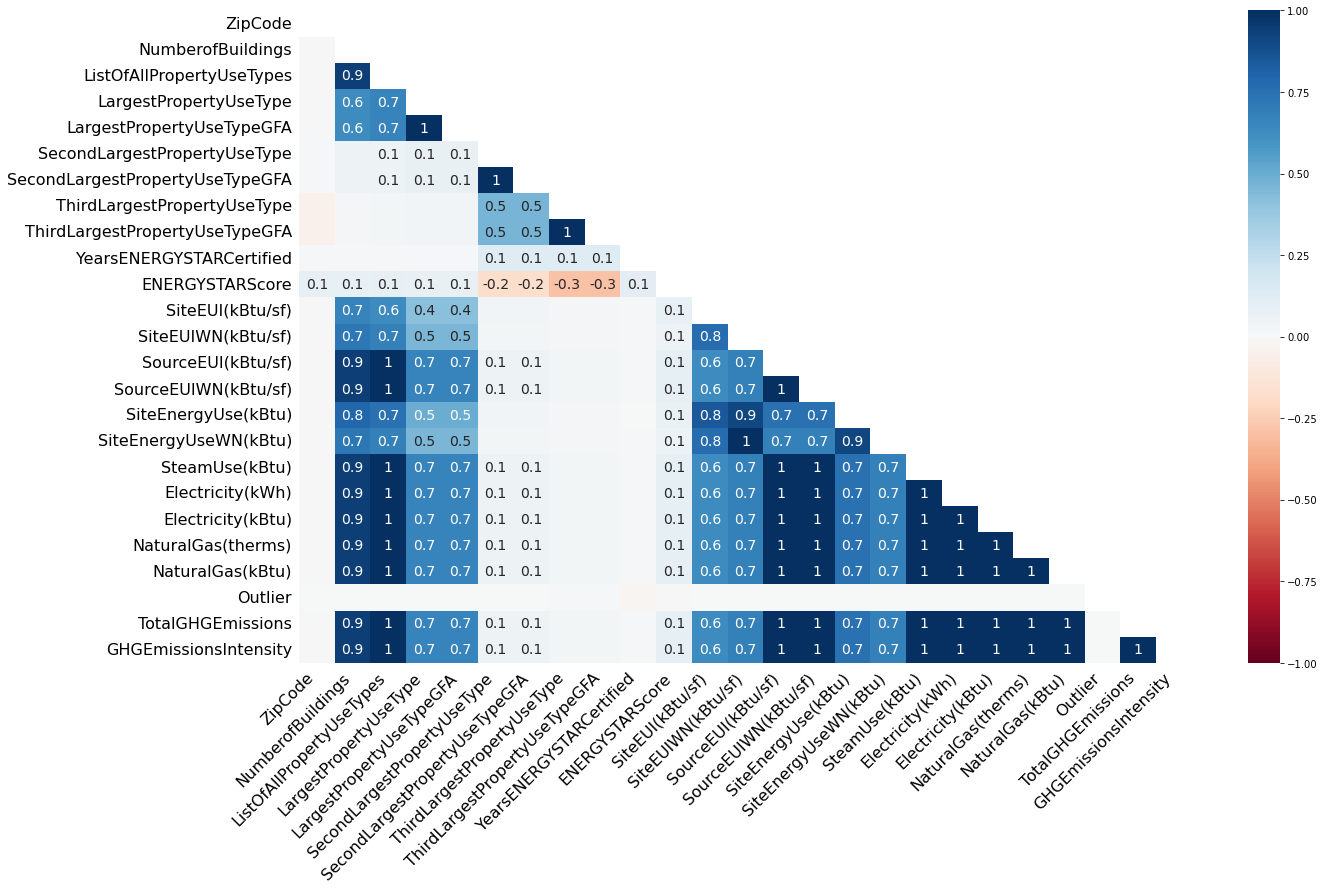

In [19]:
msno.heatmap(data)
save_fig("Diagramme des corrélations de taux de remplissage entre les colonnes du jeu de données initial")

## Analyse univariée
### Élimination des colonnes inutiles

In [20]:
df = df[df.columns[df.isna().mean() <0.9]]
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,Compliant,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,Compliant,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,Compliant,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,Compliant,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,Compliant,505.01,2.88


In [21]:
df.shape

(3376, 43)

In [22]:
# cellule utilisée pour parcourir les valeurs et nombre de valeurs uniques des colonnes catégorielles
df['Neighborhood'].value_counts()

DOWNTOWN                  573
EAST                      453
MAGNOLIA / QUEEN ANNE     423
GREATER DUWAMISH          375
NORTHEAST                 280
LAKE UNION                251
NORTHWEST                 210
SOUTHWEST                 166
NORTH                     145
BALLARD                   126
CENTRAL                   107
SOUTHEAST                  95
DELRIDGE                   80
North                      42
Central                    27
Northwest                  11
Ballard                     7
Delridge                    4
DELRIDGE NEIGHBORHOODS      1
Name: Neighborhood, dtype: int64

Nous n'avons pas besoin du numéro d'identification des bâtiments ni des colonne **'DataYear'**, **'City'**, **'State'**  qui sont constantes ni des autres colonnes ci-dessous qui ne sont pas explicative pour notre étude.

**Nous conservons néanmoins la colonne 'PropertyName' qui nous permettra de vérifier les informations d'un bâtiment dont une valeur caractéristique nous intrigue** (3362 valeurs uniques sur 3376 bâtiments, la colonne peut quasiment servir d'identifiant).

In [23]:
columns_to_drop = ['OSEBuildingID', 'DataYear', 'Address', 'City', 'State', 'TaxParcelIdentificationNumber']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [24]:
df.shape

(3376, 37)

### Analyse des colonnes cibles

#### SiteEnergyUse(kBtu)

In [25]:
df[conso].describe()

count    3.371000e+03
mean     5.403667e+06
std      2.161063e+07
min      0.000000e+00
25%      9.251286e+05
50%      1.803753e+06
75%      4.222455e+06
max      8.739237e+08
Name: SiteEnergyUse(kBtu), dtype: float64

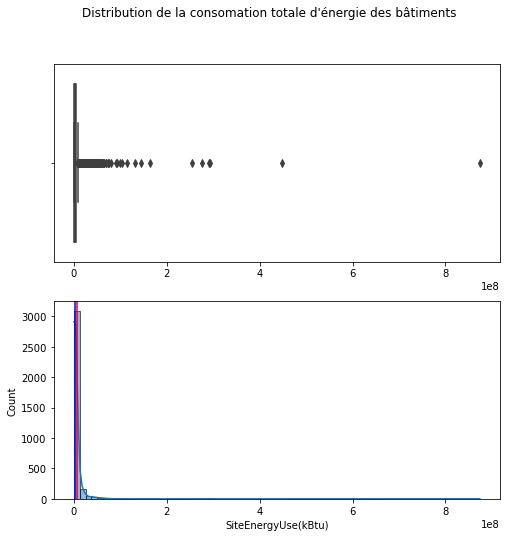

In [26]:
fig = plt.figure(figsize=(8,8))
plt.suptitle("Distribution de la consomation totale d'énergie des bâtiments")
plt.subplot(2,1,1)
ax1 = sns.boxplot(x=df[conso])
ax1.set(xlabel=None)
plt.subplot(2,1,2)
ax2 = sns.histplot(x=df[conso], kde=True, bins=70)
plt.axvline(x=df[conso].mean(), color='r', label='moyenne')
plt.axvline(x=df[conso].median(), color='b', label='médiane')
save_fig("Distribution de la consomation totale d'énergie des bâtiments")

#### TotalGHGEmissions

In [27]:
df[co2].describe()

count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

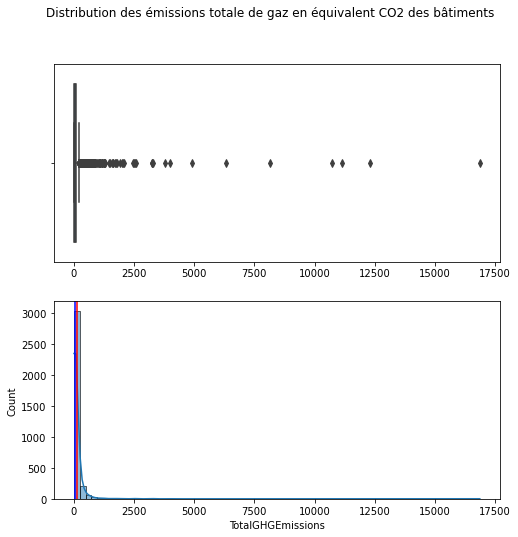

In [28]:
fig = plt.figure(figsize=(8,8))
plt.suptitle("Distribution des émissions totale de gaz en équivalent CO2 des bâtiments")
plt.subplot(2,1,1)
ax1 = sns.boxplot(x=df[co2])
ax1.set(xlabel=None)
plt.subplot(2,1,2)
ax2 = sns.histplot(x=df[co2], kde=True, bins=70)
plt.axvline(x=df[co2].mean(), color='r', label='moyenne')
plt.axvline(x=df[co2].median(), color='b', label='médiane')
save_fig("Distribution des émissions totale de gaz en équivalent CO2 des bâtiments")

### Analyse univariée des variables quantitatives

In [29]:
numerical_features = list(df.describe().columns)

In [30]:
numerical_features.remove(conso)
numerical_features.remove(co2)

numerical_features

['ZipCode',
 'CouncilDistrictCode',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'GHGEmissionsIntensity']

Nous n'allons pas observer les 2 premières colonnes numériques car à ce stade nous n'avons pas de commentaires à faire dessus, elles alimenteront notre modèle de prédiction et nous aideront à interpréter nos résultats ultérieurement.

DISTRIBUTION DES VARIABLES NUMÉRIQUES


--------------------
LATITUDE


moyenne:
 47.62
médiane:
 47.62
mode:
 [47.66]
variance:
 0.0
écart-type:
 0.05
skwewness:
 0.14
kurtosis:
 -0.14
minimum:
 47.5
maximum:
 47.73


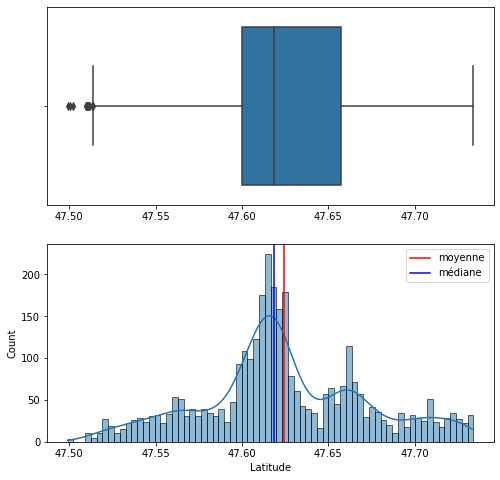

--------------------
LONGITUDE


moyenne:
 -122.33
médiane:
 -122.33
mode:
 [-122.3]
variance:
 0.0
écart-type:
 0.03
skwewness:
 -0.14
kurtosis:
 0.26
minimum:
 -122.41
maximum:
 -122.22


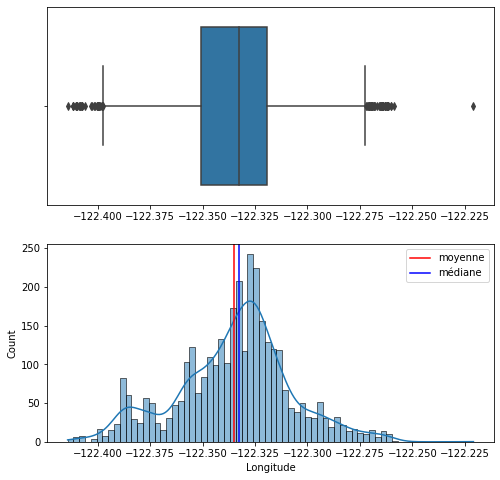

--------------------
YEARBUILT


moyenne:
 1968.57
médiane:
 1975.0
mode:
 [2000]
variance:
 1094.5
écart-type:
 33.08
skwewness:
 -0.54
kurtosis:
 -0.87
minimum:
 1900
maximum:
 2015


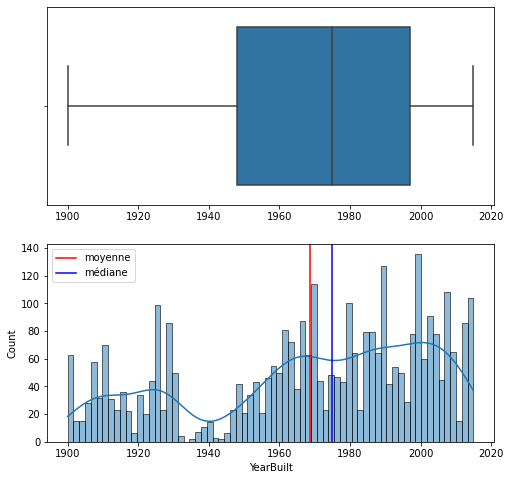

--------------------
NUMBEROFBUILDINGS


moyenne:
 1.11
médiane:
 1.0
mode:
 [1.]
variance:
 4.44
écart-type:
 2.11
skwewness:
 43.39
kurtosis:
 2205.3
minimum:
 0.0
maximum:
 111.0


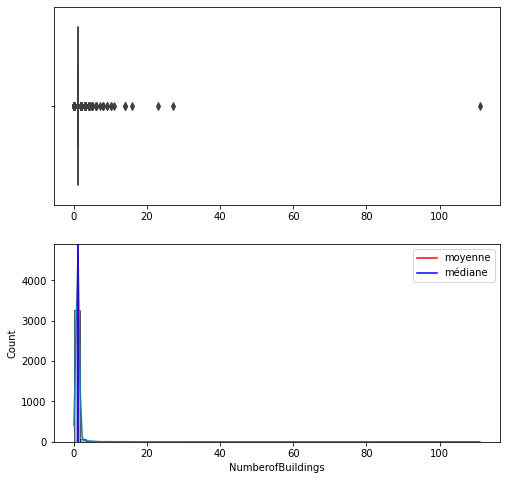

--------------------
NUMBEROFFLOORS


moyenne:
 4.71
médiane:
 4.0
mode:
 [3 4]
variance:
 30.18
écart-type:
 5.49
skwewness:
 5.92
kurtosis:
 55.95
minimum:
 0
maximum:
 99


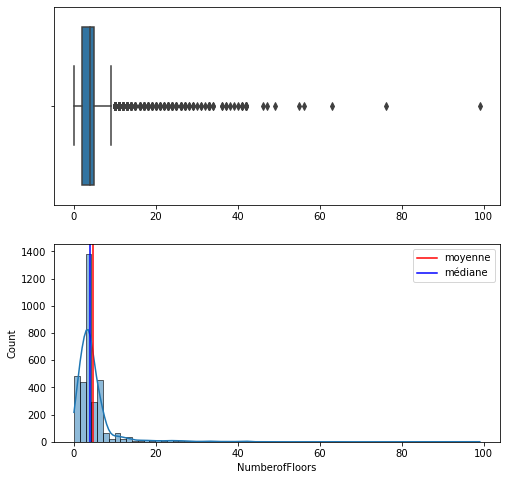

--------------------
PROPERTYGFATOTAL


moyenne:
 94833.54
médiane:
 44175.0
mode:
 [36000]
variance:
 47875712893.76
écart-type:
 218805.19
skwewness:
 24.13
kurtosis:
 946.24
minimum:
 11285
maximum:
 9320156


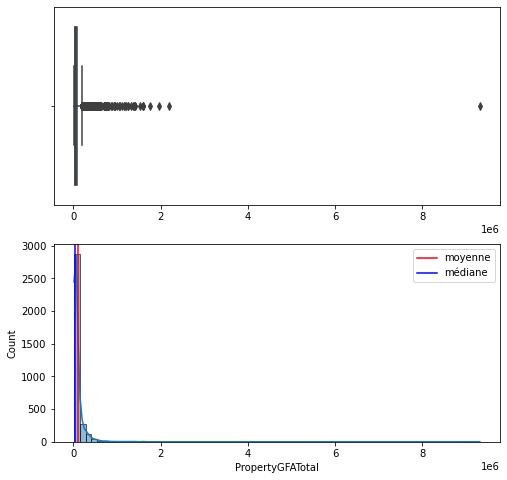

--------------------
PROPERTYGFAPARKING


moyenne:
 8001.53
médiane:
 0.0
mode:
 [0]
variance:
 1044707536.98
écart-type:
 32321.94
skwewness:
 6.65
kurtosis:
 58.97
minimum:
 0
maximum:
 512608


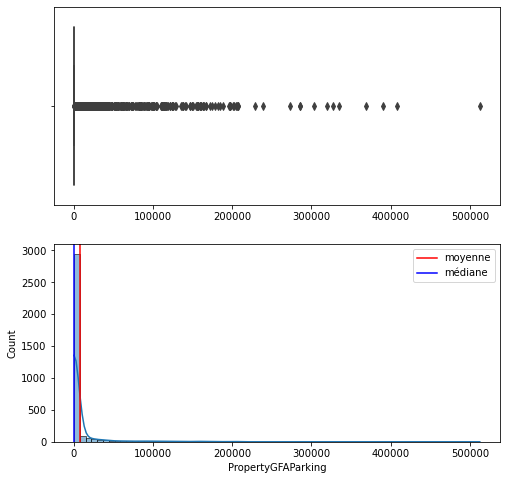

--------------------
PROPERTYGFABUILDING(S)


moyenne:
 86832.01
médiane:
 43216.0
mode:
 [36000]
variance:
 43226157632.09
écart-type:
 207909.01
skwewness:
 27.62
kurtosis:
 1161.36
minimum:
 3636
maximum:
 9320156


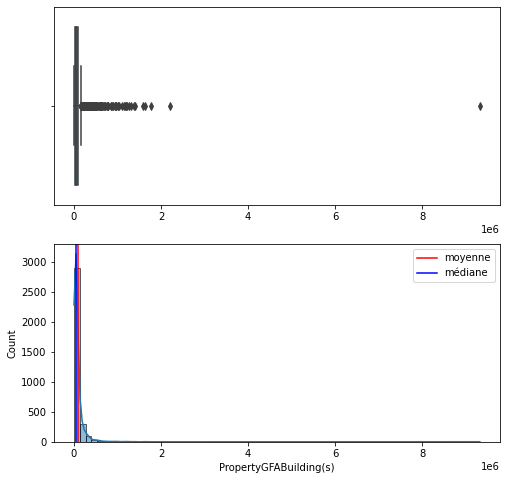

--------------------
LARGESTPROPERTYUSETYPEGFA


moyenne:
 79177.64
médiane:
 39894.0
mode:
 [22000. 24000.]
variance:
 40672141749.91
écart-type:
 201673.35
skwewness:
 30.1
kurtosis:
 1320.61
minimum:
 5656.0
maximum:
 9320156.0


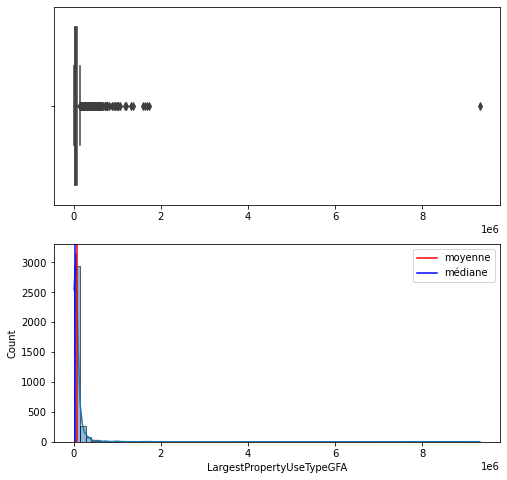

--------------------
SECONDLARGESTPROPERTYUSETYPEGFA


moyenne:
 28444.08
médiane:
 10664.0
mode:
 [0.]
variance:
 2956827406.69
écart-type:
 54376.72
skwewness:
 5.03
kurtosis:
 36.3
minimum:
 0.0
maximum:
 686750.0


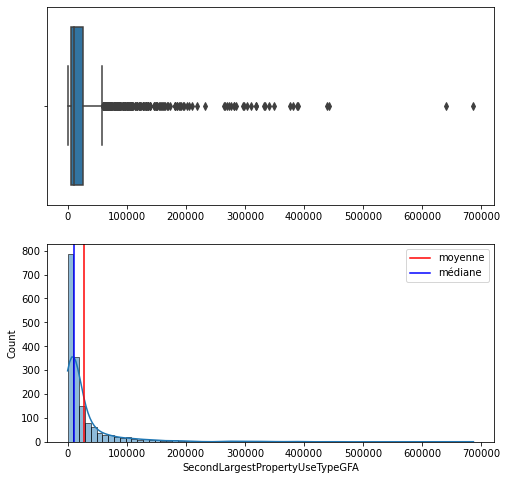

--------------------
THIRDLARGESTPROPERTYUSETYPEGFA


moyenne:
 11738.68
médiane:
 5043.0
mode:
 [0.]
variance:
 858875762.88
écart-type:
 29306.58
skwewness:
 9.2
kurtosis:
 114.19
minimum:
 0.0
maximum:
 459748.0


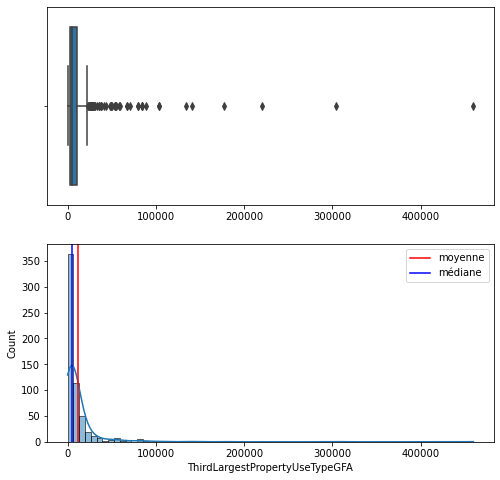

--------------------
ENERGYSTARSCORE


moyenne:
 67.92
médiane:
 75.0
mode:
 [100.]
variance:
 721.89
écart-type:
 26.87
skwewness:
 -0.86
kurtosis:
 -0.22
minimum:
 1.0
maximum:
 100.0


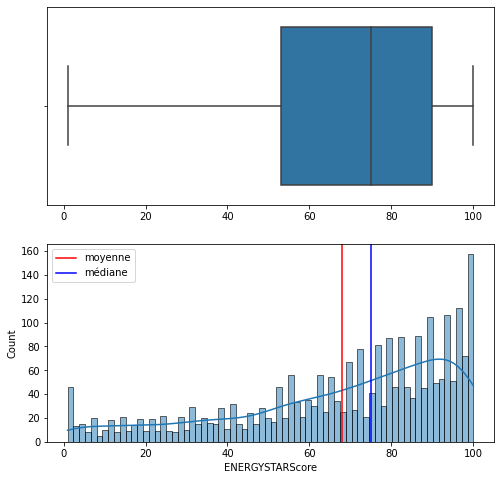

--------------------
SITEEUI(KBTU/SF)


moyenne:
 54.73
médiane:
 38.6
mode:
 [24.7 28.8]
variance:
 3165.72
écart-type:
 56.26
skwewness:
 4.98
kurtosis:
 39.99
minimum:
 0.0
maximum:
 834.4


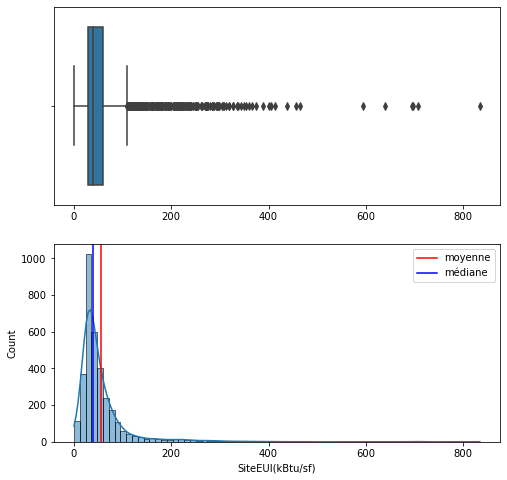

--------------------
SITEEUIWN(KBTU/SF)


moyenne:
 57.03
médiane:
 40.9
mode:
 [0.]
variance:
 3266.68
écart-type:
 57.15
skwewness:
 4.83
kurtosis:
 37.64
minimum:
 0.0
maximum:
 834.4


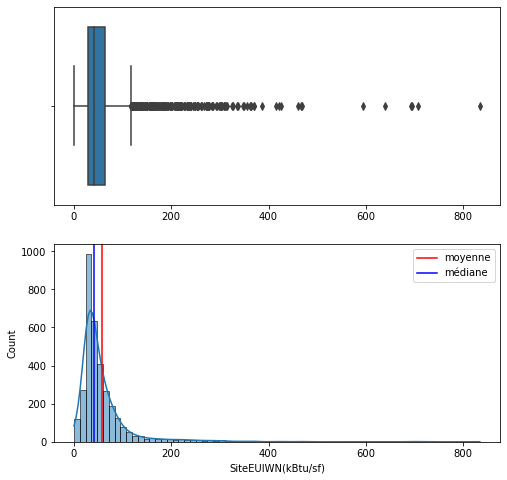

--------------------
SOURCEEUI(KBTU/SF)


moyenne:
 134.23
médiane:
 96.2
mode:
 [0.]
variance:
 19395.26
écart-type:
 139.27
skwewness:
 6.6
kurtosis:
 77.66
minimum:
 0.0
maximum:
 2620.0


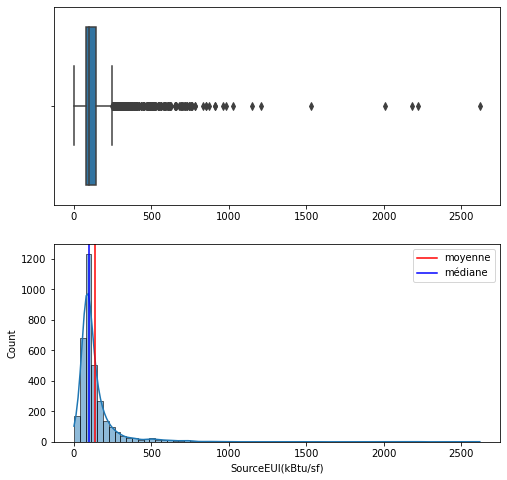

--------------------
SOURCEEUIWN(KBTU/SF)


moyenne:
 137.78
médiane:
 101.1
mode:
 [0.]
variance:
 19345.79
écart-type:
 139.09
skwewness:
 6.57
kurtosis:
 77.44
minimum:
 -2.1
maximum:
 2620.0


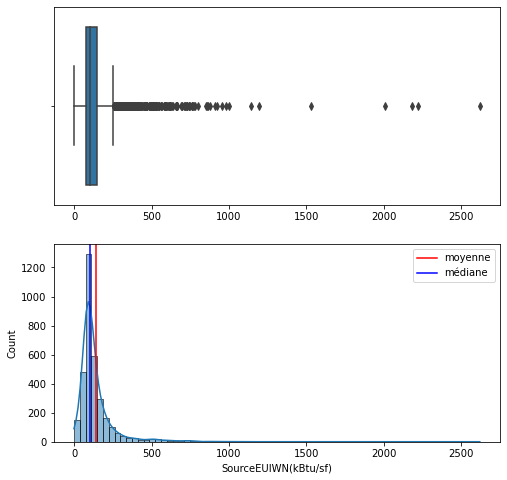

--------------------
SITEENERGYUSEWN(KBTU)


moyenne:
 5276725.71
médiane:
 1904452.0
mode:
 [0.]
variance:
 253969530338759.72
écart-type:
 15936421.5
skwewness:
 15.27
kurtosis:
 334.51
minimum:
 0.0
maximum:
 471613856.0


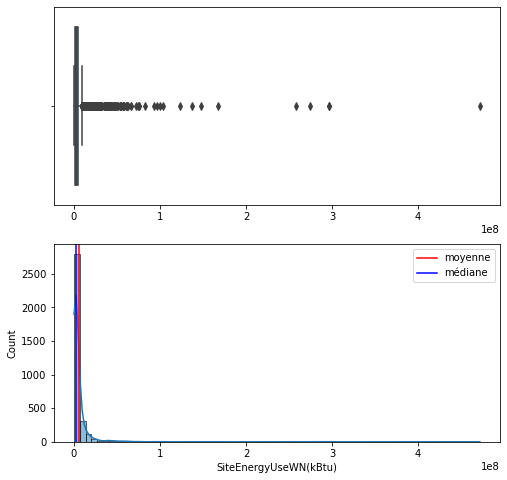

--------------------
STEAMUSE(KBTU)


moyenne:
 274595.9
médiane:
 0.0
mode:
 [0.]
variance:
 15300555035078.24
écart-type:
 3911592.39
skwewness:
 26.72
kurtosis:
 804.86
minimum:
 0.0
maximum:
 134943456.0


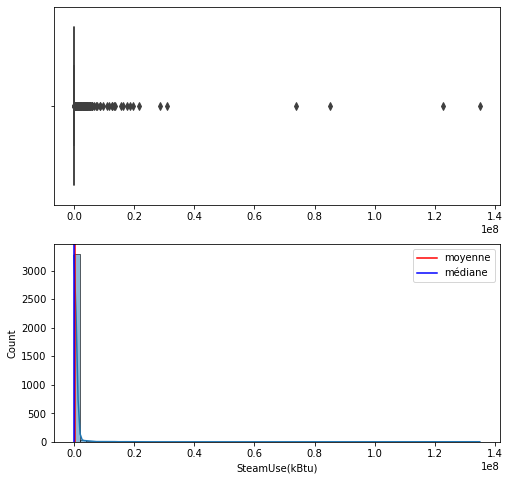

--------------------
ELECTRICITY(KWH)


moyenne:
 1086638.97
médiane:
 345129.91
mode:
 [0.]
variance:
 18938441438792.23
écart-type:
 4351831.96
skwewness:
 28.73
kurtosis:
 1157.5
minimum:
 -33826.8
maximum:
 192577488.0


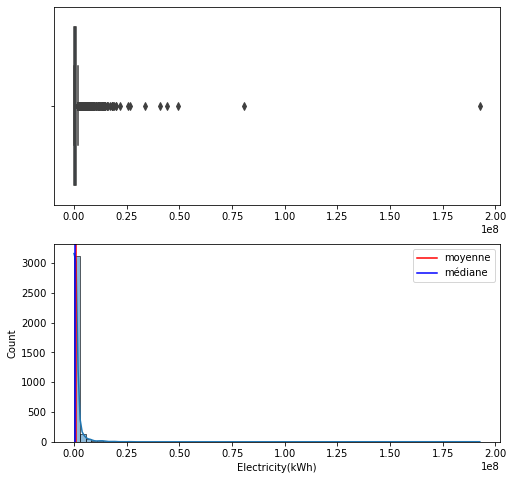

--------------------
ELECTRICITY(KBTU)


moyenne:
 3707612.16
médiane:
 1177583.0
mode:
 [0.]
variance:
 220476486721864.62
écart-type:
 14848450.65
skwewness:
 28.73
kurtosis:
 1157.5
minimum:
 -115417.0
maximum:
 657074389.0


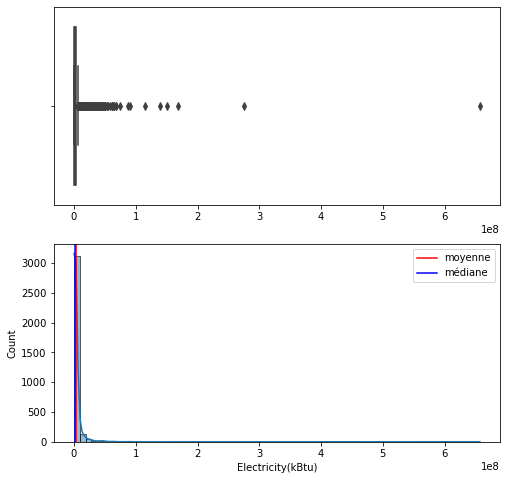

--------------------
NATURALGAS(THERMS)


moyenne:
 13685.05
médiane:
 3237.54
mode:
 [0.]
variance:
 4500778748.31
écart-type:
 67087.84
skwewness:
 30.04
kurtosis:
 1201.03
minimum:
 0.0
maximum:
 2979090.0


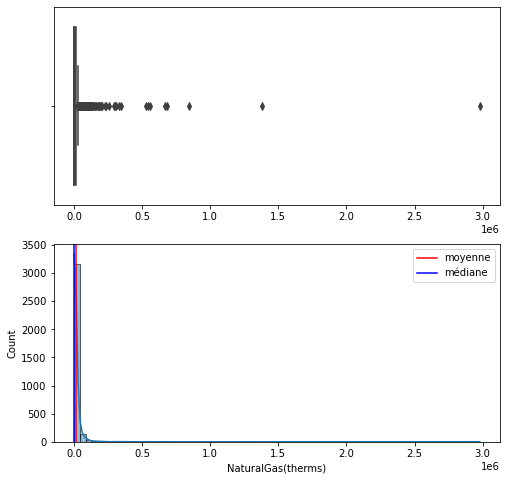

--------------------
NATURALGAS(KBTU)


moyenne:
 1368504.54
médiane:
 323754.0
mode:
 [0.]
variance:
 45007787554572.96
écart-type:
 6708784.36
skwewness:
 30.04
kurtosis:
 1201.03
minimum:
 0.0
maximum:
 297909000.0


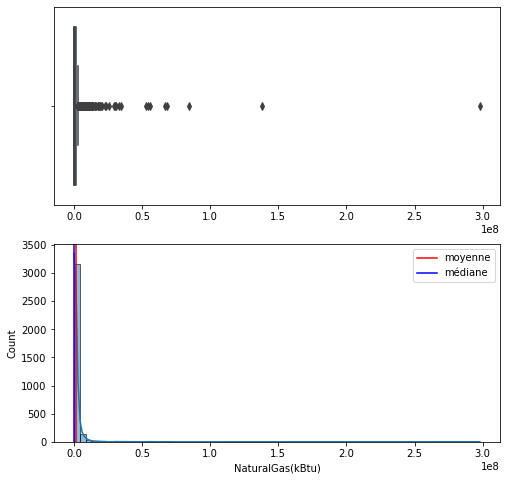

--------------------
GHGEMISSIONSINTENSITY


moyenne:
 1.18
médiane:
 0.61
mode:
 [0.15 0.17]
variance:
 3.32
écart-type:
 1.82
skwewness:
 5.59
kurtosis:
 57.37
minimum:
 -0.02
maximum:
 34.09


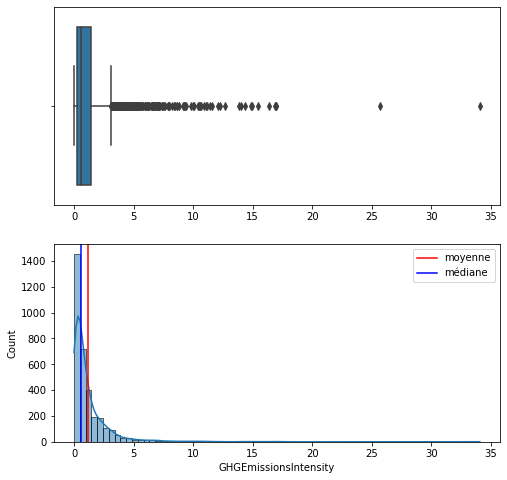

In [31]:
print('DISTRIBUTION DES VARIABLES NUMÉRIQUES')
print('\n')
for col in numerical_features[2:]:
    subset = df[col]
    print("-"*20)
    print(col.upper())
    print('\n')
    print("moyenne:\n",np.round(subset.mean(),2))
    print("médiane:\n",np.round(subset.median(),2))
    print("mode:\n",np.round(subset.mode().values,2))
    print("variance:\n",np.round(subset.var(ddof=0),2))
    print("écart-type:\n",np.round(subset.std(ddof=0),2))
    print("skwewness:\n",np.round(subset.skew(),2))
    print("kurtosis:\n",np.round(subset.kurtosis(),2))
    print("minimum:\n",np.round(subset.min(),2))
    print("maximum:\n",np.round(subset.max(),2))
    fig = plt.figure(figsize=(8,8))
    plt.subplot(2,1,1)
    ax1 = sns.boxplot(x=subset)
    ax1.set(xlabel=None)
    plt.subplot(2,1,2)
    ax2 = sns.histplot(x=df[col], kde=True, bins=70)
    plt.axvline(x=df[col].mean(), color='r', label='moyenne')
    plt.axvline(x=df[col].median(), color='b', label='médiane')
    plt.legend()
    save_fig(f"distribution de {col.replace('/','')}")
    plt.show()

#### Rapport d'analyse univariée des variables quantitatives

Les bâtiments ont été construits en moyenne en 1968, avec la moitié des bâtiments construits avant ou après 1975, les plus anciens datant de 1900 et les plus récent de 2015.

Les portefeuilles de bâtiments rapportés dans ce jeu contiennent en moyenne 1.11 bâtiments, avec une valeur maximale pour le campus de Seattle de l'université de Washington comptant 111 bâtiments. Cette ligne dans notre jeu de données comptera également la valeur maximale des variables 'PROPERTYGFATOTAL', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'SiteEnergyUse(kBtu)' et la valeur minimale de la variable 'YEARBUILT'.

In [32]:
df[df['NumberofBuildings']>20]

,BuildingType,PrimaryPropertyType,PropertyName,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
105,Campus,University,SSCC MAIN CAMPUS,98106.0,1,DELRIDGE,47.54700,-122.35307,1970,27.0,2,441071,0,441071,College/University,College/University,483000.0,NaN,NaN,NaN,NaN,NaN,79.300003,85.199997,192.800003,202.600006,38301744.0,41151732.0,0.0,7419277.5,25314575.0,129871.66410,12987166.0,False,Compliant,866.23,1.96
1862,Campus,Other,FT C15 Fishermen's Center,98119.0,7,MAGNOLIA / QUEEN ANNE,47.65561,-122.38063,1955,23.0,1,260241,0,260241,Other,Other,260241.0,NaN,NaN,NaN,NaN,NaN,130.699997,138.500000,353.200012,374.500000,34012980.0,36034584.0,0.0,7882361.0,26894616.0,71183.61719,7118362.0,False,Compliant,565.55,2.17
3274,Campus,University,University of Washington - Seattle Campus,98105.0,4,NORTHEAST,47.65644,-122.31041,1900,111.0,0,9320156,0,9320156,College/University,College/University,9320156.0,NaN,NaN,NaN,NaN,NaN,93.800003,0.000000,246.600006,0.000000,873923712.0,0.0,84985240.0,192577488.0,657074389.0,0.00000,0.0,False,Compliant,11140.56,1.20


In [33]:
df[df['NumberofBuildings']==df['NumberofBuildings'].max()]

,BuildingType,PrimaryPropertyType,PropertyName,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
3274,Campus,University,University of Washington - Seattle Campus,98105.0,4,NORTHEAST,47.65644,-122.31041,1900,111.0,0,9320156,0,9320156,College/University,College/University,9320156.0,NaN,NaN,NaN,NaN,NaN,93.800003,0.0,246.600006,0.0,873923712.0,0.0,84985240.0,192577488.0,657074389.0,0.0,0.0,False,Compliant,11140.56,1.2


Bien qu'il éveille notre curiosité de par ses valeurs extrêmes, nous choisissons de supprimer le campus de notre jeu de données car il s'agit d'un cas hors-norme qui nous desservira dans l'entraînement de nos modèles plus tard.

In [34]:
df.drop(index=3274, inplace=True)

Ces bâtiments possèdent en moyenne 4.7 floors, soit 3.7 étages en élévation (système américain de comptage) avec une valeur maximale de 99 qui doit être une valeur aberrante car elle concerne une église, et la valeur de "PropertyGFATotal" est faible comparée aux bâtiments qui ont un nombre presque aussi élevé d'étage.

In [35]:
df[df['NumberofFloors']>60]

,BuildingType,PrimaryPropertyType,PropertyName,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
233,Nonresidential COS,Large Office,Seattle Municipal Tower (2030),98104.0,3,DOWNTOWN,47.60501,-122.32988,1990,1.0,63,1354987,159600,1195387,"Office, Parking",Office,1191115.0,Parking,159599.0,Other,18656.0,89.0,50.400002,50.400002,158.100006,158.100006,6.157618e+07,6.157618e+07,0.0,18046946.0,61576180.0,0.00000,0.0,False,Compliant,429.27,0.32
559,NonResidential,Large Office,Columbia Center - 2015,98104.0,7,DOWNTOWN,47.60454,-122.33072,1985,1.0,76,1952220,319400,1632820,"Office, Parking",Office,1680937.0,Parking,319368.0,NaN,NaN,86.0,55.299999,55.099998,167.300003,166.500000,9.293764e+07,9.253726e+07,0.0,25747908.0,87851862.0,50857.63281,5085763.0,False,Compliant,882.56,0.45
1359,NonResidential,Worship Facility,Seattle Chinese Baptist Church,98108.0,2,GREATER DUWAMISH,47.55072,-122.30265,1977,1.0,99,21948,0,21948,Worship Facility,Worship Facility,21948.0,NaN,NaN,NaN,NaN,80.0,14.900000,14.900000,46.599998,46.599998,3.260012e+05,3.260012e+05,0.0,95545.5,326001.0,0.00000,0.0,False,Compliant,2.27,0.10


Après une courte recherche Internet, il s'avère que l'église possède 1 étage (2 floors).

Source : https://npgallery.nps.gov/NRHP/GetAsset/NRHP/86002094_text

In [36]:
df.iloc[1359, df.columns.get_loc('NumberofFloors')]=2

Les portefeuilles de bâtiments ont une 'PROPERTYGFATOTAL' de <b>94 833</b> pieds carrés en moyenne avec une médiane à <b>44 175</b> pieds carrés. La valeur maximale de cette variable est obtenue pour le campus de l'université, et qui, rapportée au nombre de bâtiments qu'il comporte revient à une 'PROPERTYGFATOTAL' moyenne de <b>83 965</b> pieds carrés, qui est une valeur raisonnable.

In [37]:
df[df['NumberofBuildings']==df['NumberofBuildings'].max()]['PropertyGFATotal']/df[df['NumberofBuildings']==df['NumberofBuildings'].max()]['NumberofBuildings']

105    16335.962963
dtype: float64

Les portefeuilles de bâtiments ont 'PropertyGFAParking' de <b>8001</b> pieds carrés en moyenne, avec une médiane à 0 (<b>2872</b> bâtiments, soit <b>85%</b> ne possèdent pas de parking, en comptant le campus de l'Université). La moyenne est ainsi tirée vers le haut par la présence de parking de bâtiment de types grands bureaux, de loisirs et autres.

In [38]:
df[df['PropertyGFAParking']==0].shape[0]

2871

In [39]:
df[df['PropertyGFAParking']>300000]

,BuildingType,PrimaryPropertyType,PropertyName,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
77,NonResidential,Large Office,Bill and Melinda Gates Foundation,98109.0,7,MAGNOLIA / QUEEN ANNE,47.62419,-122.34443,2010,1.0,6,920598,303707,616891,"Office, Other, Parking",Office,729584.0,Parking,185014.0,Other,6000.0,93.0,49.799999,51.799999,130.800003,131.600006,36667044.0,38105108.0,0.000,8088294.50,27597261.0,90697.79688,9069780.0,False,Compliant,674.09,0.73
155,NonResidential,Other,CenturyLink,98134.0,2,GREATER DUWAMISH,47.59544,-122.33159,1999,1.0,6,1585960,327680,1258280,"Other - Entertainment/Public Assembly, Parking",Other - Entertainment/Public Assembly,1585960.0,Parking,0.0,NaN,NaN,NaN,37.700001,39.200001,104.699997,106.300003,59757440.0,62160304.0,0.000,14490010.00,49439914.0,103175.17970,10317518.0,False,Compliant,892.63,0.56
163,NonResidential,Other,Building 1,98125.0,5,NORTH,47.70281,-122.32532,2008,1.0,6,419848,335109,84739,"Fast Food Restaurant, Medical Office, Movie Th...",Parking,335109.0,Movie Theater,65000.0,Medical Office,13567.0,NaN,107.800003,109.000000,285.700012,285.100006,9134963.0,9238992.0,0.000,2050189.25,6995246.0,21397.16016,2139716.0,False,Compliant,162.41,0.39
229,NonResidential,Large Office,Safeco Plaza,98154.0,7,DOWNTOWN,47.60615,-122.33388,1969,1.0,49,1123435,368980,754455,"Financial Office, Food Sales, Office, Other, P...",Office,808980.0,Parking,232248.0,Other,30329.0,89.0,52.700001,55.500000,149.000000,154.699997,45163308.0,47518124.0,0.000,11248209.00,38378889.0,67844.14844,6784415.0,False,Compliant,627.87,0.56
273,NonResidential,Large Office,US Bank Centre,98101.0,7,DOWNTOWN,47.61054,-122.33466,1989,1.0,46,1536606,512608,1023998,"Financial Office, Office, Other, Parking, Rest...",Office,1002403.0,Parking,377046.0,Other,53116.0,89.0,51.900002,53.599998,157.300003,162.699997,56606136.0,58506844.0,0.000,15729209.00,53668061.0,29380.69922,2938070.0,False,Compliant,530.18,0.35
292,NonResidential,Large Office,Two Union Square,98101.0,7,DOWNTOWN,47.61043,-122.33206,1989,1.0,56,1605578,389860,1215718,"Office, Other, Parking",Office,1314475.0,Parking,389860.0,Other,30744.0,97.0,36.799999,37.900002,110.300003,113.300003,49517704.0,50984500.0,915654.875,13505807.00,46081813.0,25202.29883,2520230.0,False,Compliant,525.78,0.33
307,NonResidential,Medical Office,1101 Madison Tower,98104.0,3,EAST,47.60921,-122.32425,1992,1.0,14,690158,407795,282363,"Medical Office, Parking",Medical Office,270384.0,Parking,270383.0,NaN,NaN,58.0,78.199997,78.199997,245.699997,245.699997,21156670.0,21156670.0,0.000,6200665.00,21156669.0,0.00000,0.0,False,Compliant,147.49,0.21
559,NonResidential,Large Office,Columbia Center - 2015,98104.0,7,DOWNTOWN,47.60454,-122.33072,1985,1.0,76,1952220,319400,1632820,"Office, Parking",Office,1680937.0,Parking,319368.0,NaN,NaN,86.0,55.299999,55.099998,167.300003,166.500000,92937640.0,92537256.0,0.000,25747908.00,87851862.0,50857.63281,5085763.0,False,Compliant,882.56,0.45


Les portefeuilles de bâtiments ont une 'LARGESTPROPERTYUSETYPEGFA' de <b>79 177 pieds</b> carrés en moyenne et leur médiane vaut 39 894 pieds carrés. 

<u>Il sera intéressant d'étudier le rapport 'LARGESTPROPERTYUSETYPEGFA'/'PropertyGFATotal' par la suite pour chercher à comprendre si un bâtiment est plus ou moins énergivore en fonction de la surface qu'il consacre à l'activité principale qu'il renferme (et pour lequel il est censé être optimisé)</u>.

In [40]:
100*df['PrimaryPropertyType'].value_counts(normalize=True)

Low-Rise Multifamily           29.244444
Mid-Rise Multifamily           16.711111
Small- and Mid-Sized Office     8.681481
Other                           7.585185
Warehouse                       5.540741
Large Office                    5.125926
K-12 School                     4.118519
Mixed Use Property              3.940741
High-Rise Multifamily           3.111111
Retail Store                    2.696296
Hotel                           2.281481
Worship Facility                2.103704
Distribution Center             1.570370
Senior Care Community           1.333333
Supermarket / Grocery Store     1.185185
Medical Office                  1.155556
Self-Storage Facility           0.829630
University                      0.711111
Residence Hall                  0.681481
Refrigerated Warehouse          0.355556
Restaurant                      0.355556
Hospital                        0.296296
Laboratory                      0.296296
Office                          0.088889
Name: PrimaryPro

In [41]:
100*df['BuildingType'].value_counts(normalize=True)

NonResidential          43.259259
Multifamily LR (1-4)    30.162963
Multifamily MR (5-9)    17.185185
Multifamily HR (10+)     3.259259
SPS-District K-12        2.903704
Nonresidential COS       2.518519
Campus                   0.681481
Nonresidential WA        0.029630
Name: BuildingType, dtype: float64

Pour la suite de l'analyse nous allons nous séparer des variables énergétiques dont l'unité ne s'exprime pas en kBtu ou kbBtu/sf car elles portent la même information que leur colonne en kBtu ou kBtu/sf conjointe.

In [42]:
for col in df.columns:
    if col.__contains__('kWh') or col.__contains__('therms'):
        df.drop(columns=col, inplace=True)

In [43]:
numerical_features = list(df.describe().columns)
numerical_features.remove(conso)
numerical_features.remove(co2)

### Analyse univariée des variables qualitatives

In [44]:
categorical_features = list(df.select_dtypes('object').columns)
categorical_features.remove('PropertyName')

In [45]:
for col in categorical_features:
    print(f"{col :-<40}{df[col].nunique()} catégories uniques dans cette colonne\n{df[col].value_counts()}\n")

BuildingType----------------------------8 catégories uniques dans cette colonne
NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    23
Nonresidential WA          1
Name: BuildingType, dtype: int64

PrimaryPropertyType---------------------24 catégories uniques dans cette colonne
Low-Rise Multifamily           987
Mid-Rise Multifamily           564
Small- and Mid-Sized Office    293
Other                          256
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             133
High-Rise Multifamily          105
Retail Store                    91
Hotel                           77
Worship Facility                71
Distribution Center             53
Senior Care Community           45
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage 

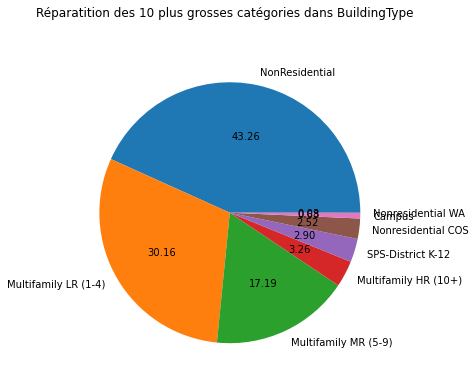

Les 10 plus grosses catégories dans BuildingType représentent 100.0% du total


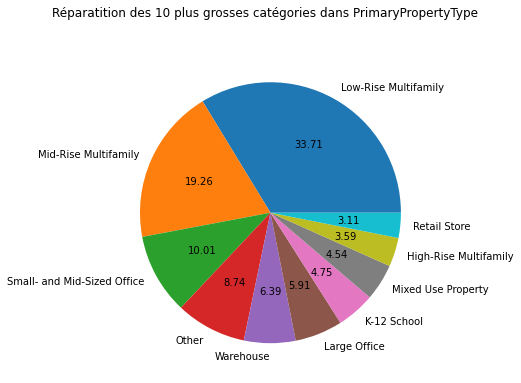

Les 10 plus grosses catégories dans PrimaryPropertyType représentent 87.0% du total


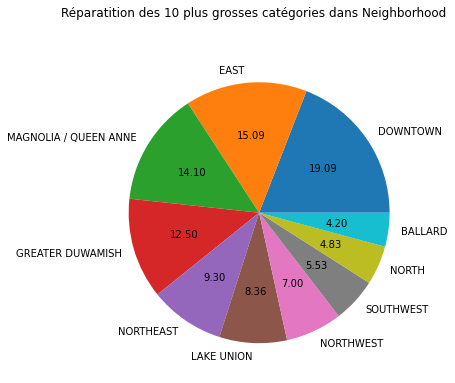

Les 10 plus grosses catégories dans Neighborhood représentent 89.0% du total


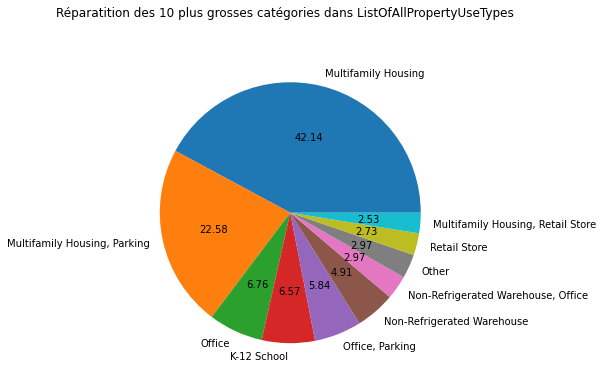

Les 10 plus grosses catégories dans ListOfAllPropertyUseTypes représentent 61.0% du total


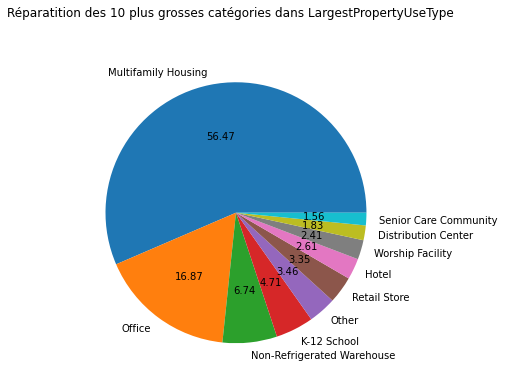

Les 10 plus grosses catégories dans LargestPropertyUseType représentent 88.0% du total


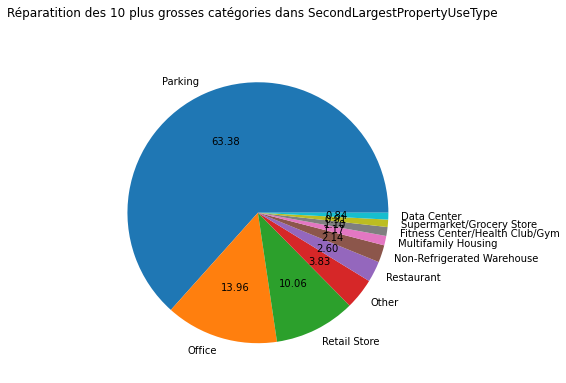

Les 10 plus grosses catégories dans SecondLargestPropertyUseType représentent 92.0% du total


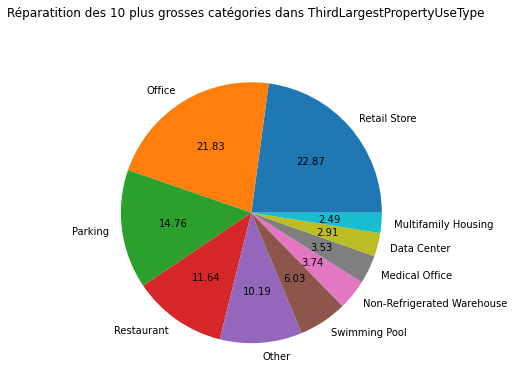

Les 10 plus grosses catégories dans ThirdLargestPropertyUseType représentent 81.0% du total


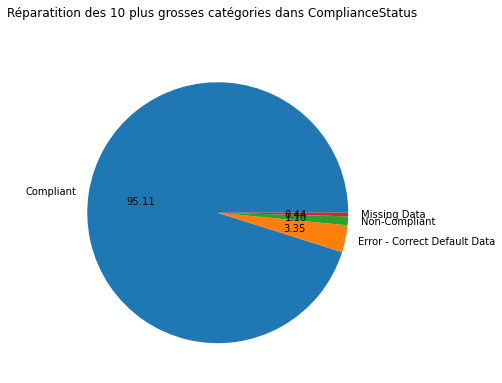

Les 10 plus grosses catégories dans ComplianceStatus représentent 100.0% du total


In [46]:
for col in categorical_features:
    plt.figure(figsize=(6,6))
    plt.suptitle(f"Réparatition des 10 plus grosses catégories dans {col}")
    plt.pie(df[col].value_counts()[:10], labels=df[col].value_counts()[:10].index, autopct='%.2f')
    save_fig(f"Réparatition des 10 plus grosses catégories dans {col}")
    plt.show()
    print(f"Les 10 plus grosses catégories dans {col} représentent {100*np.round(df[col].value_counts(normalize=True)[:10].values.sum(),2)}% du total")

#### Rapport d'analyse univariée des variables qualitatives

<u><i>BuildingType</i></u>

La plus grosse catégorie individuelle de bâtiments concerne les bâtiments non-résidentiels (<b>43.25%</b>), mais le parc est partagé de manière équilibré entre bâtiments résidentiels (<b>50.79%</b> du parc en combinant les 3 plus grosses catégories de bâtiments résidentiels) et non-résidentiels (ceux qui nous intéressent dans notre étude).

<u><i>PrimaryPropertyType</i></u>

La grande majorité des bâtiments résidentiels sont de faibles et moyennes élévation (1-4 pour les 'Low-rise', 5-9 pour les Mid-rise'), et constitue plus de la moitié des usages principaux des bâtiments de la ville, le reste étant princpalement des bureaux, entrepôts, écoles, magasins.

<u><i>Neighborhood</i></u>

Nous pouvons distinguer 4 quartiers principaux en termes de nombre de bâtiments, dans l'ordre décroissant : DOWNTOWN, EAST, MAGNOLIA/QUAEEN ANNE et GREATER DUWAMISH.

<u><i>ListOfAllPropertyUseTypes</i></u>

Nous remarquons qu'un usage, jusque là passer sous les radars, semble représenter une part importante : celui de Parking.

L'usage principal est ici encore confirmé comme étant celui de résidences familliales.

<u><i>LargestPropertyUseType</i></u>

Sans surprise, le type d'usage représentant la plus grande part des surfaces des bâtiments est celui de résidence familiale.

Viennent ensuite les bureaux et les entrepôts de stockage non-réfrigéré.

<u><i>SecondLargestPropertyUseType</i></u>

Notre observation plus haut se trouve confirmé, le type d'usage 'Parking' est le second usage représentant le plus de surface dans les bâtiments. 

Viennent ensuite les bureaux et les magasins.

<u><i>ThirdLargestPropertyUseType</i></u>

Le troisième plus gros usage des surfaces des bâtiments le plus fréquent est celui de bureaux.

Viennent ensuite les parkings et les restaurants.

<u><i>ComplianceStatus</i></u>

La très grande majorité (95.11%) des bâtiments sont en conformité vis-à-vis des exigences de l'nalyse comparative énergétique pour l'année de déclaration (2016).

In [47]:
pd.DataFrame(100*df.groupby(['LargestPropertyUseType']).sum()['LargestPropertyUseTypeGFA'].sort_values(ascending=False)[:10]/df.groupby(['LargestPropertyUseType']).sum()['LargestPropertyUseTypeGFA'].sum())

,LargestPropertyUseTypeGFA
LargestPropertyUseType,
Multifamily Housing,38.102446
Office,23.499627
Non-Refrigerated Warehouse,4.247471
K-12 School,4.235958
Hotel,4.166095
Other,3.171344
Hospital (General Medical & Surgical),2.665084
Retail Store,2.427305
Senior Care Community,2.176171


In [48]:
pd.DataFrame(100*df.groupby(['SecondLargestPropertyUseType']).sum()['SecondLargestPropertyUseTypeGFA'].sort_values(ascending=False)[:10]/df.groupby(['SecondLargestPropertyUseType']).sum()['SecondLargestPropertyUseTypeGFA'].sum())

,SecondLargestPropertyUseTypeGFA
SecondLargestPropertyUseType,
Parking,70.162528
Office,8.453616
Retail Store,4.902017
Multifamily Housing,2.360213
Laboratory,2.025736
Other,1.968585
Other - Entertainment/Public Assembly,1.056653
Non-Refrigerated Warehouse,0.996032
Supermarket/Grocery Store,0.877682


In [49]:
pd.DataFrame(100*df.groupby(['ThirdLargestPropertyUseType']).sum()['ThirdLargestPropertyUseTypeGFA'].sort_values(ascending=False)[:10]/df.groupby(['ThirdLargestPropertyUseType']).sum()['ThirdLargestPropertyUseTypeGFA'].sum())

,ThirdLargestPropertyUseTypeGFA
ThirdLargestPropertyUseType,
Parking,15.185334
Retail Store,14.942826
Office,13.799992
Non-Refrigerated Warehouse,11.404909
Other,10.480500
Restaurant,6.525696
Financial Office,5.998385
Multifamily Housing,3.881036
Medical Office,2.778401


## Analyse bivariée variables/cibles

### Analyse bivariée des variables quantitatives

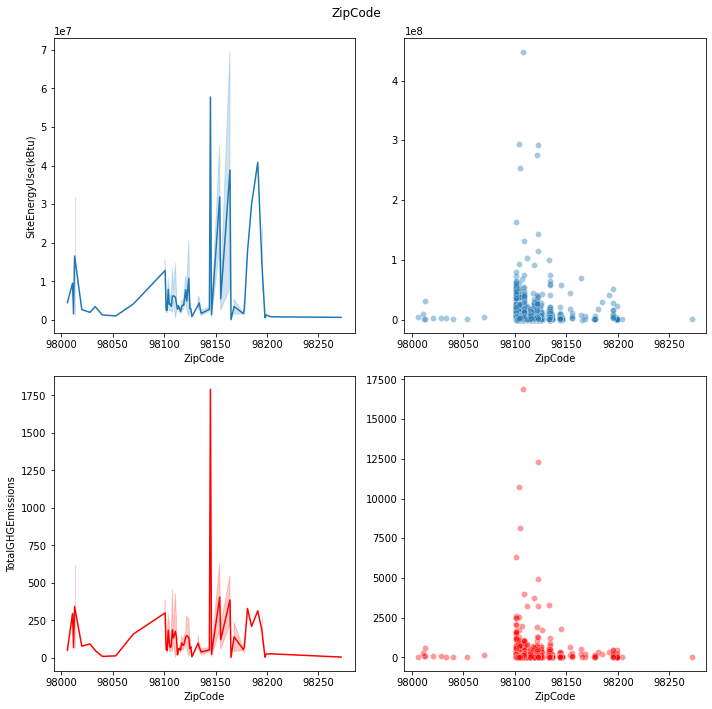

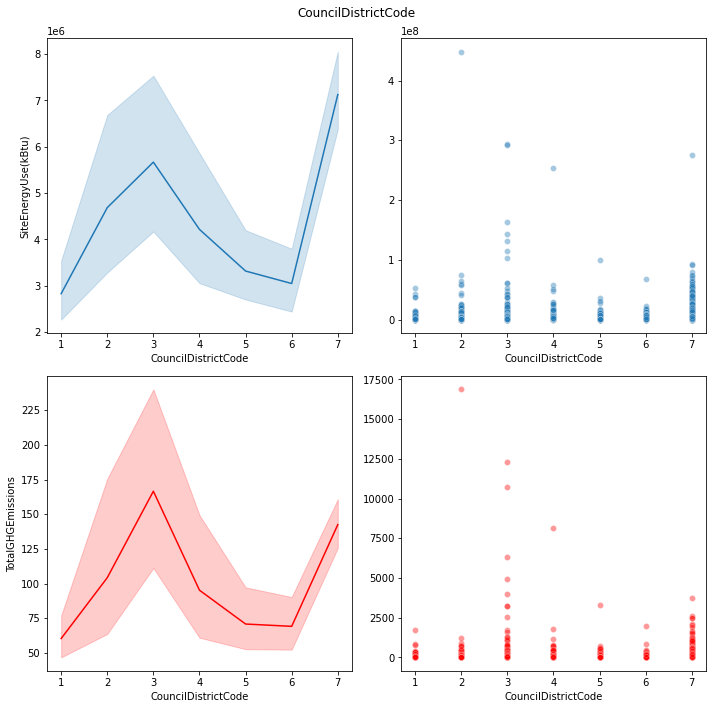

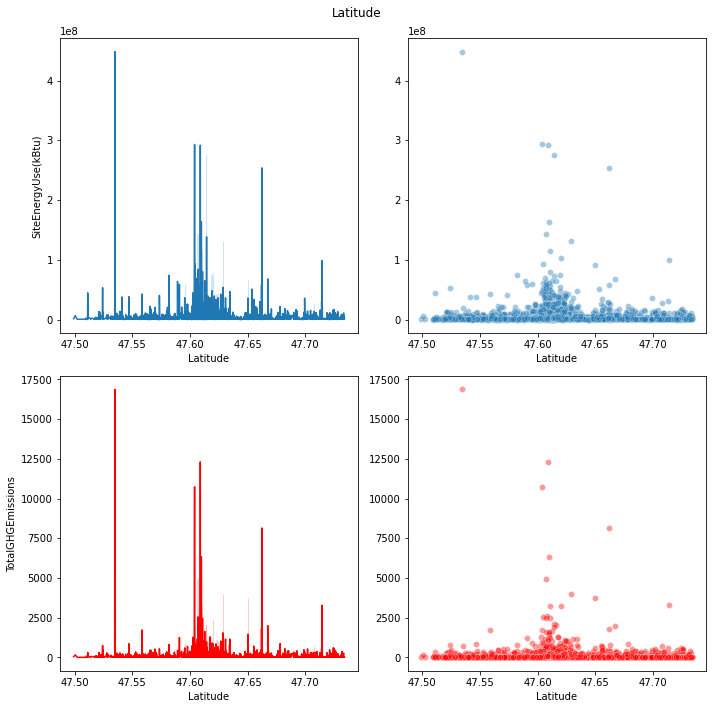

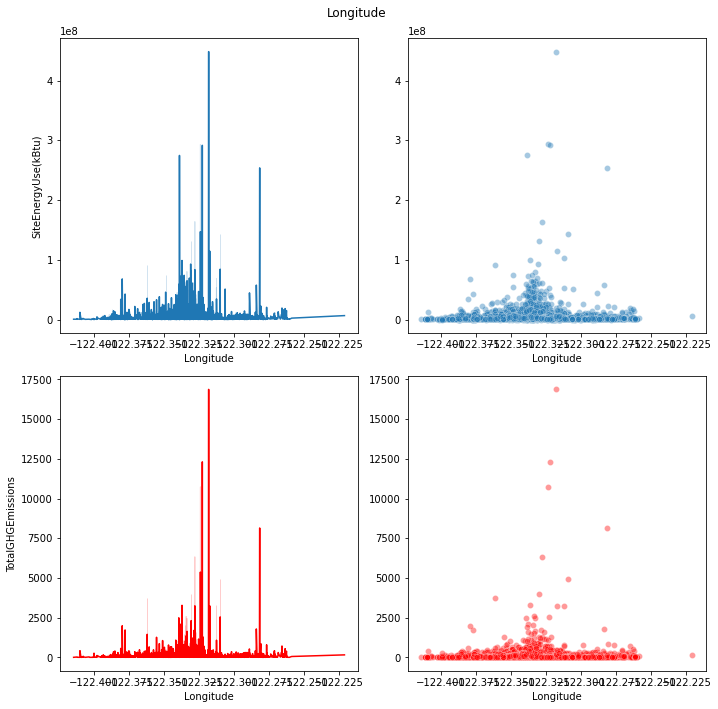

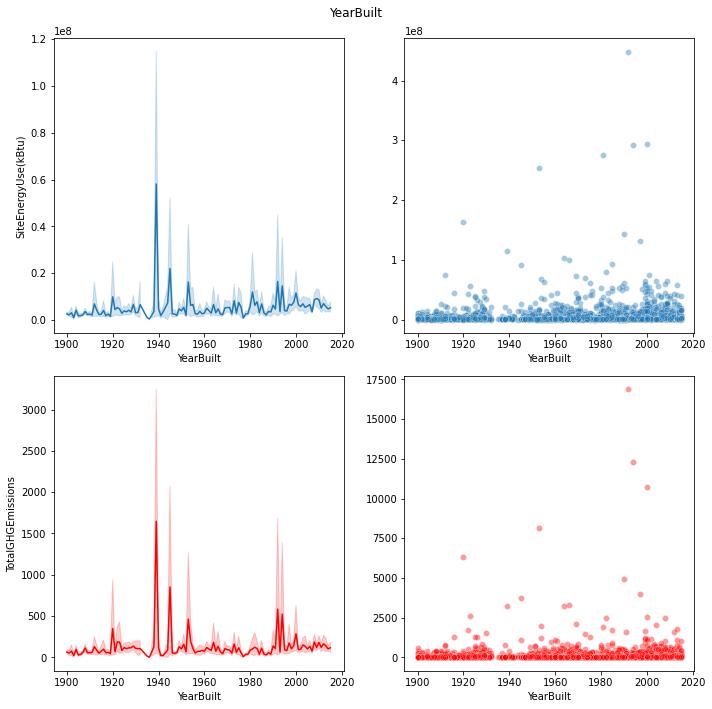

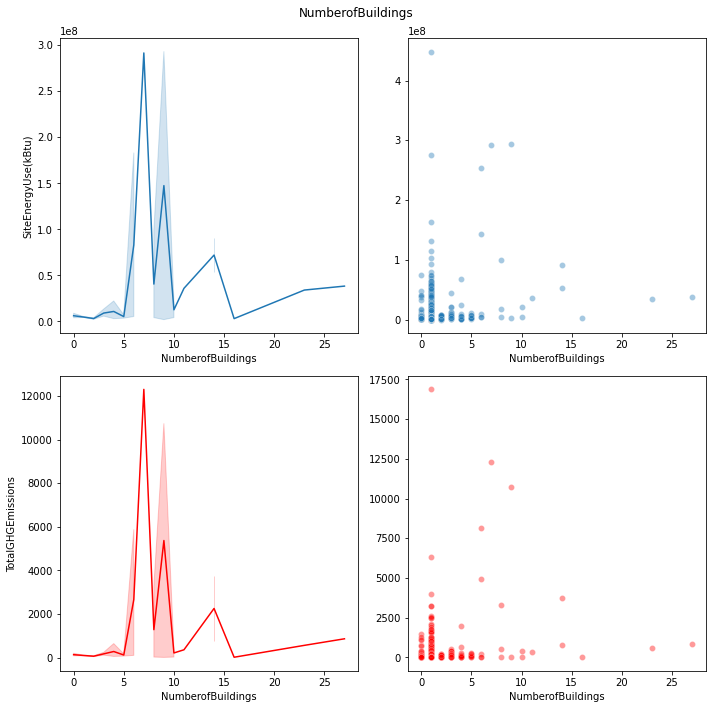

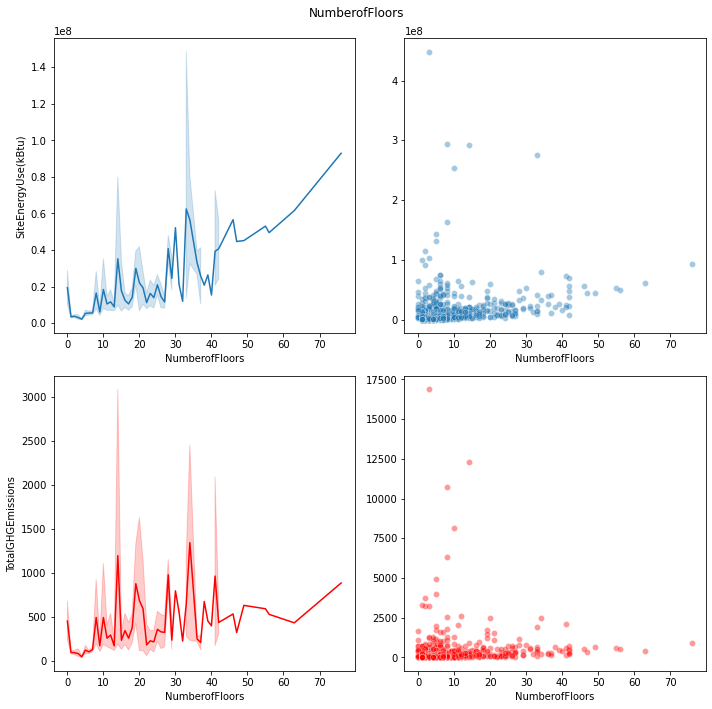

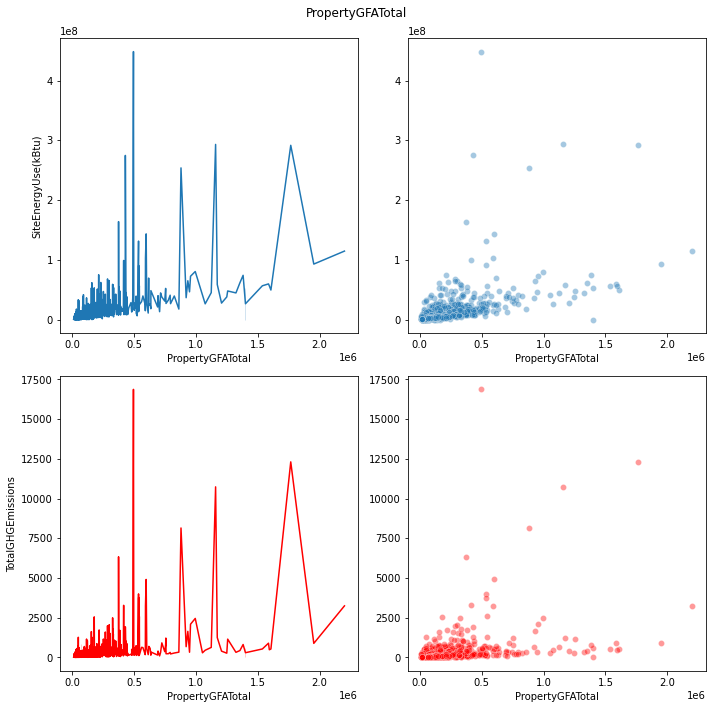

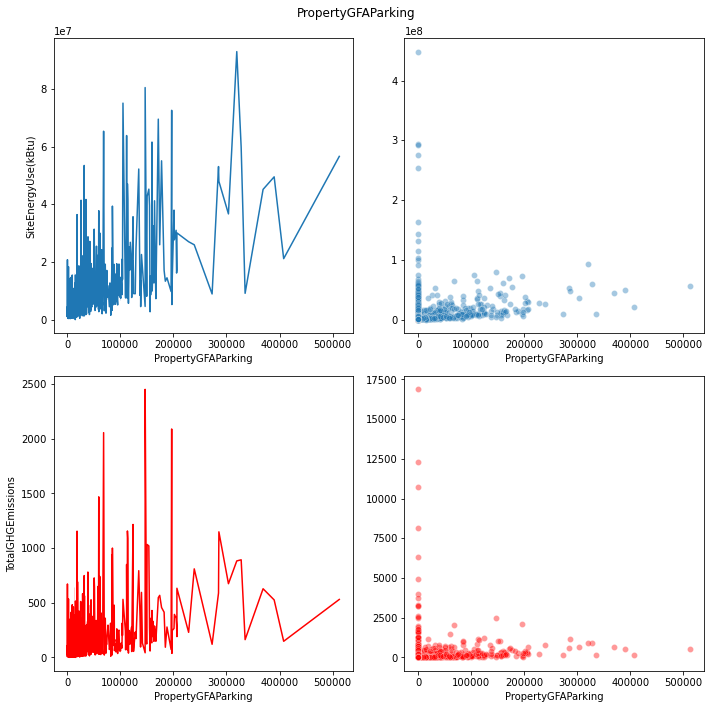

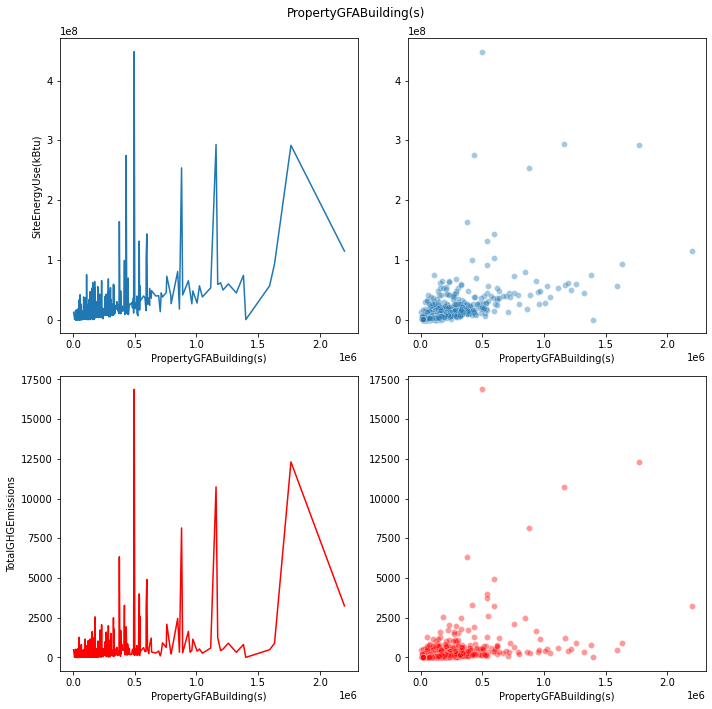

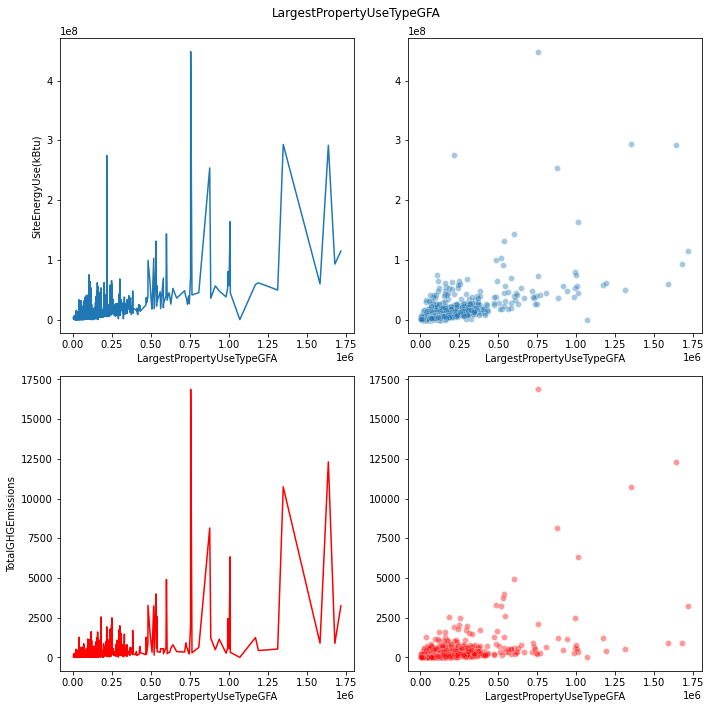

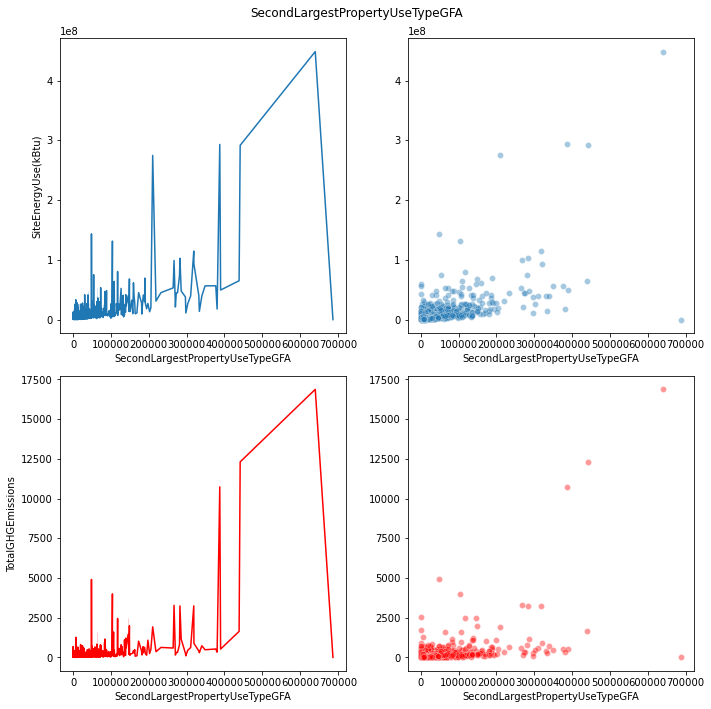

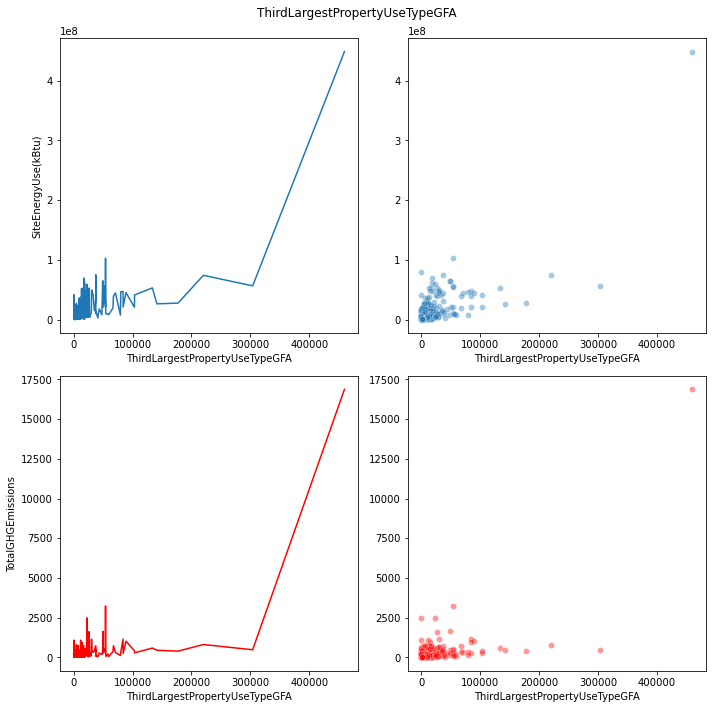

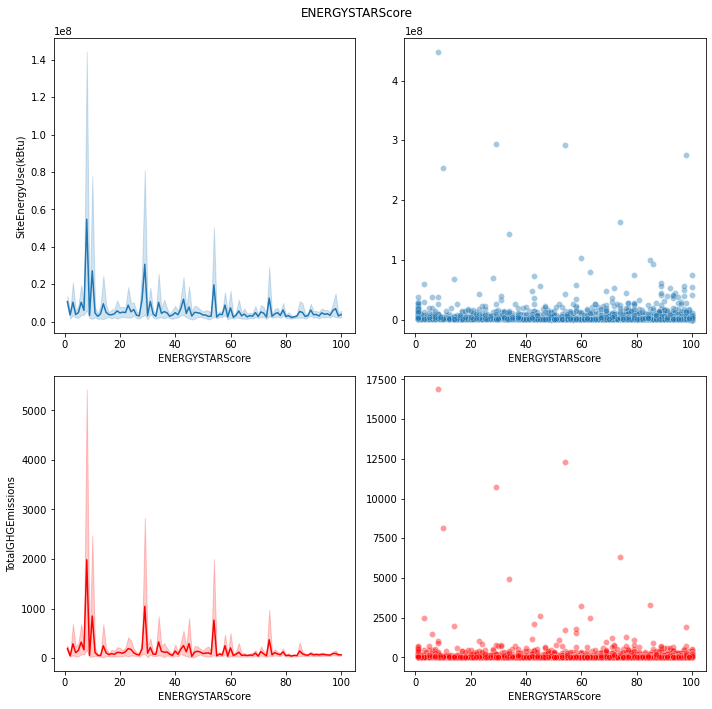

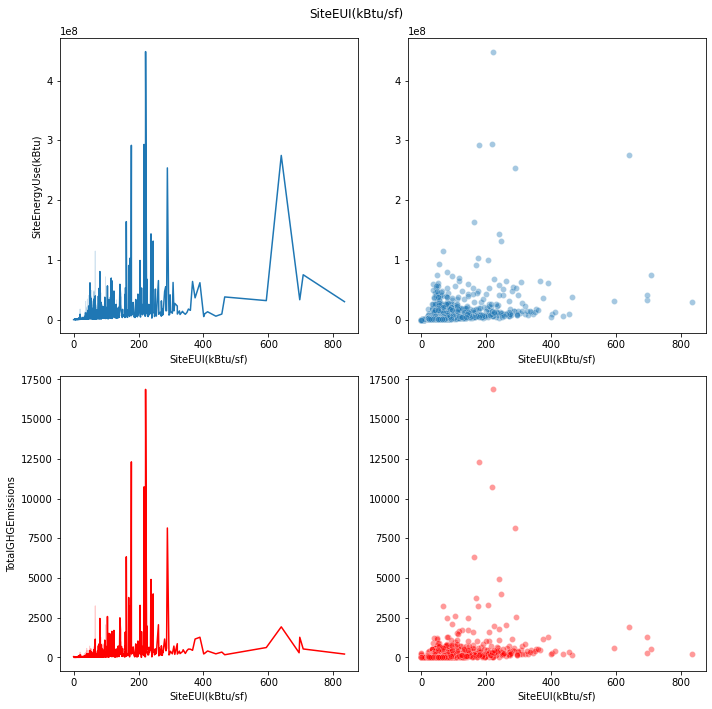

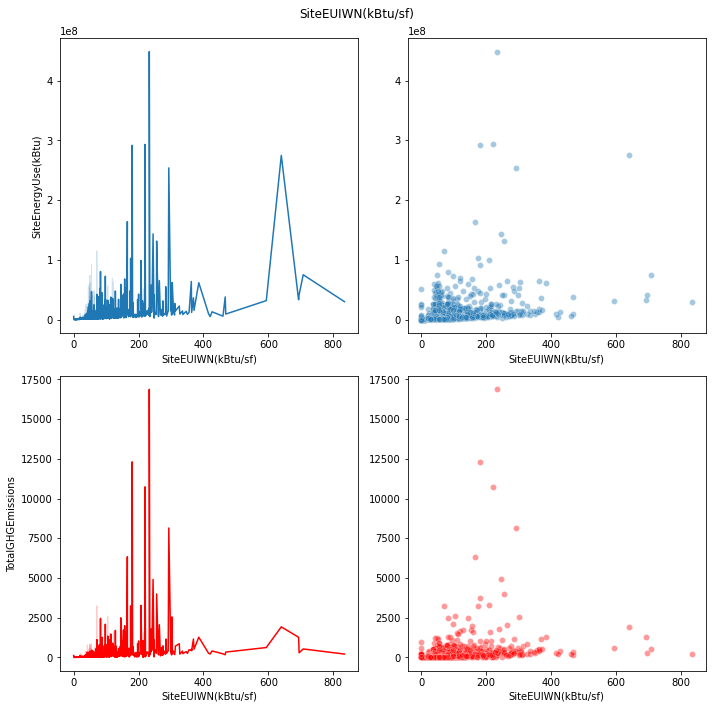

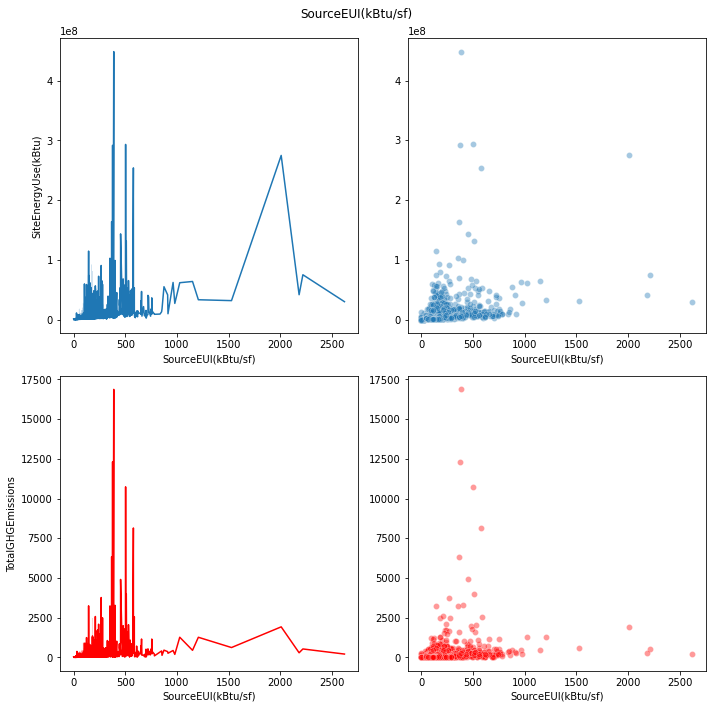

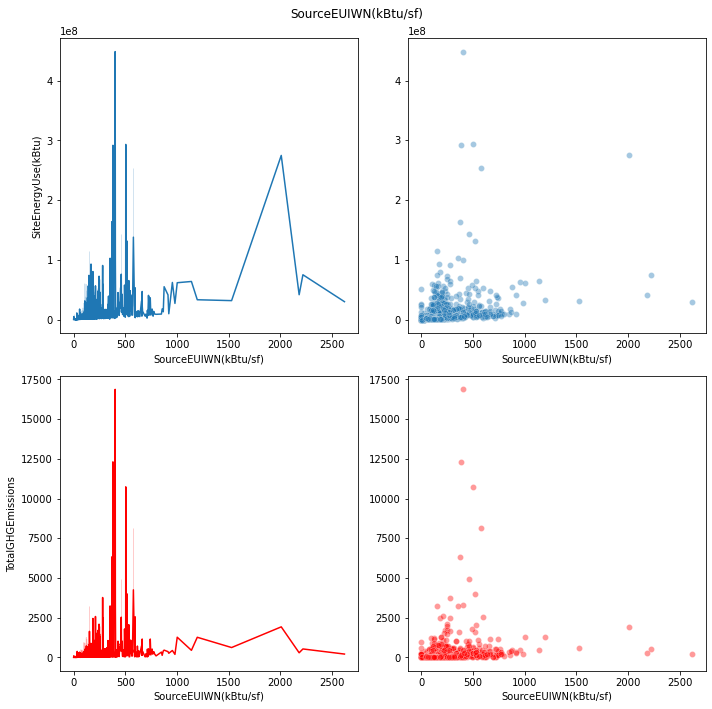

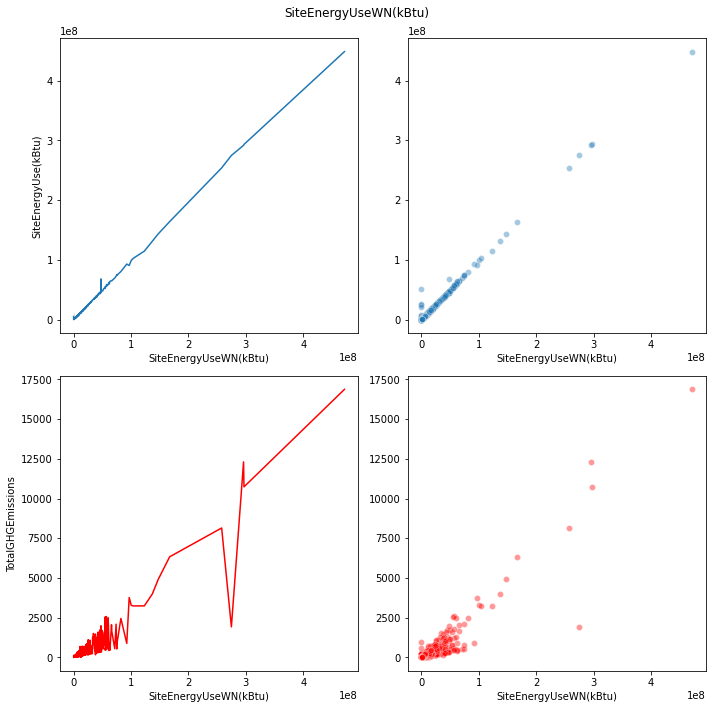

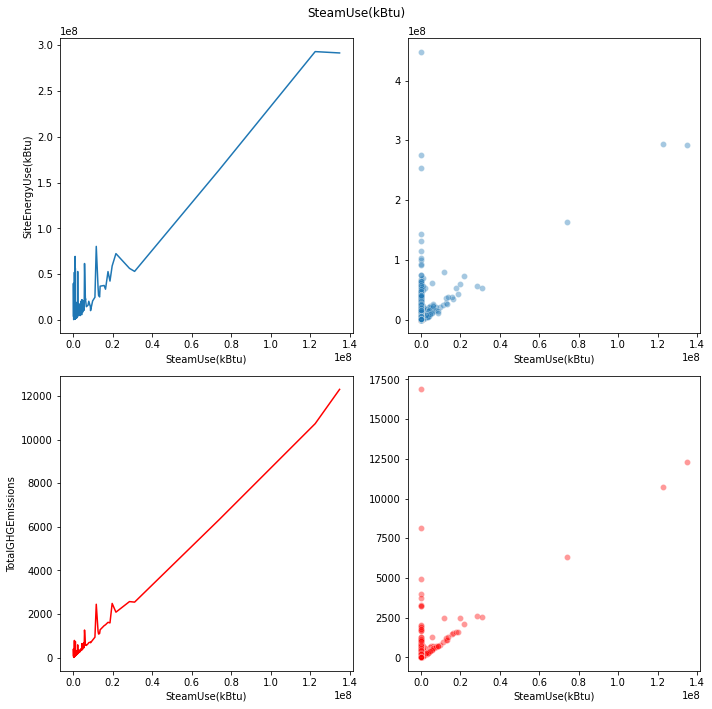

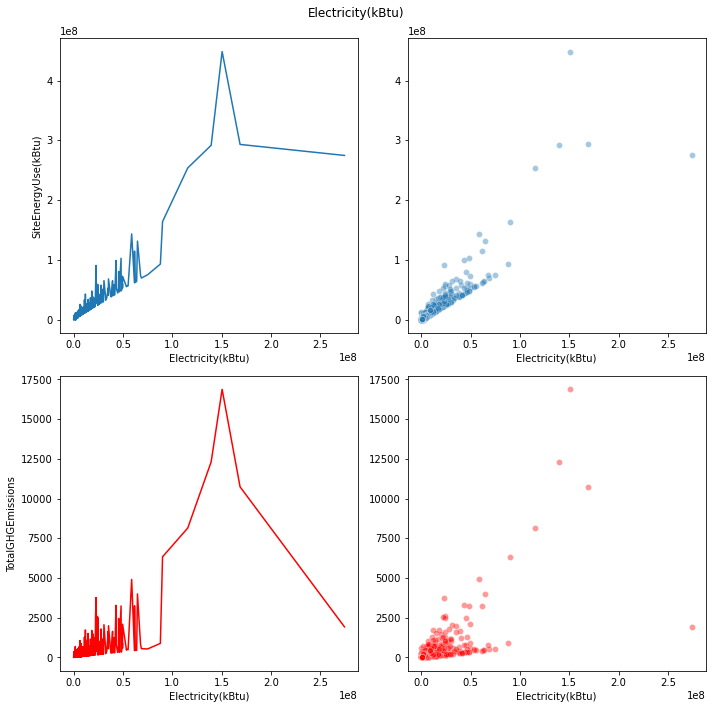

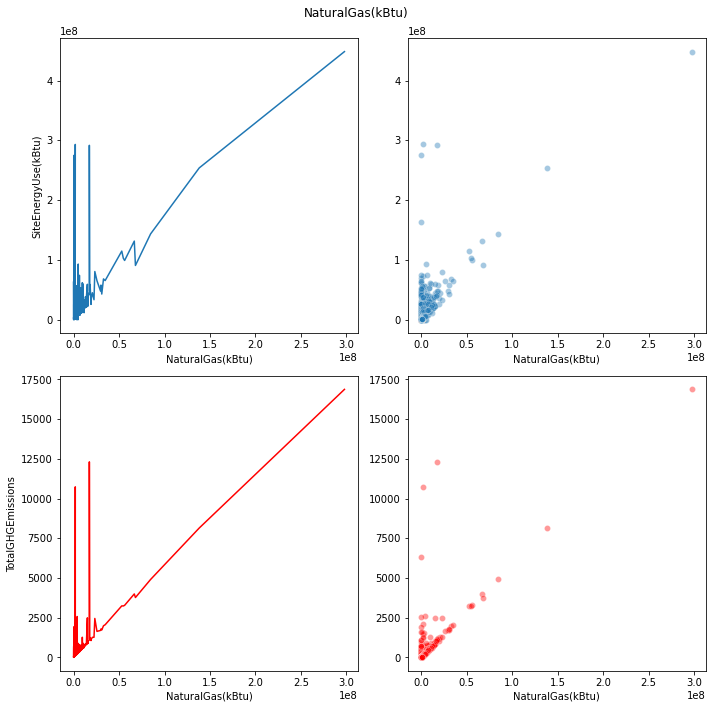

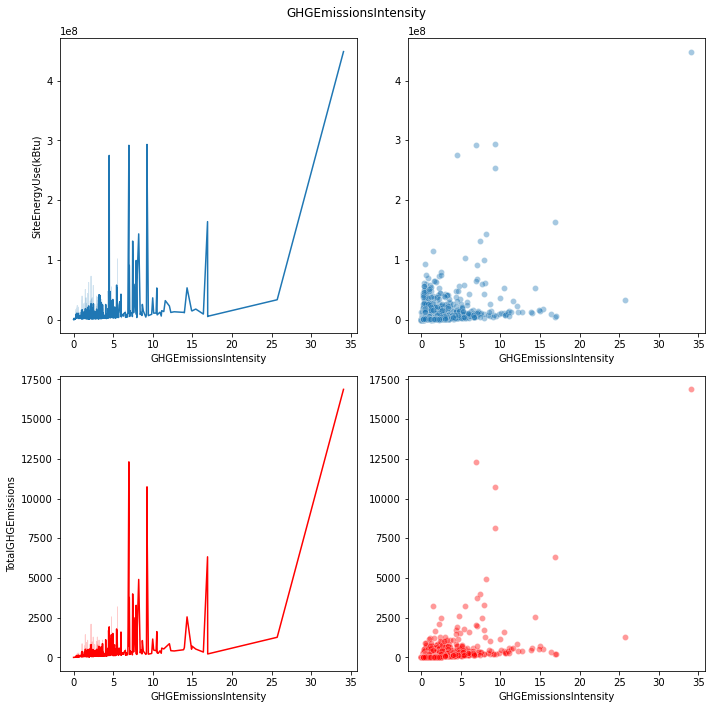

In [50]:
for col in numerical_features:
    fig = plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    plt.suptitle(col)
    ax1 = sns.lineplot(data=df, x=col, y=conso)
    plt.subplot(2,2,2)
    ax2 = sns.scatterplot(data=df, x=col, y=conso, alpha=0.4)
    ax2.set(ylabel=None)
    plt.subplot(2,2,3)
    ax3 = sns.lineplot(data=df, x=col, y=co2, color='red')
    plt.subplot(2,2,4)
    ax4 = sns.scatterplot(data=df, x=col, y=co2, color='red', alpha=0.4)
    ax4.set(ylabel=None)
    plt.tight_layout()
    save_fig(f"Évolution comparée des valeurs cibles en fonction de {col.replace('/','')}")
    plt.show()

#### Rapport d'analyse bivariée des variables quantitatives

Premièrement, on remarque que les relations 'conso/variable' et 'co2/variable' sont similaires en termes d'évolution, avec des pics de valeurs différents néanmoins. Notre rapport d'analyse s'en trouve ainsi simplifier car chaque point soulevé vaudra pour les 2 relations différentes.

<u><i>ZipCode</i></u> & <u><i>CouncilDistrictCode</i></u>

Nous pourrons étudier de plus près la nature des activités les plus fréquentes dans les bâtiments des zones où le 'ZipCode' correspond à un pic de valeur pour se faire une idée des usages de bâtiments qui sont susceptibles d'être les plus énergivores et émetteurs de CO2.

L'évolution des valeurs cibles en fonction de 'CouncilDistrictCode va dans ce sens : certaines zones de la ville abritent des activités plus énergivores et plus émettrices de CO2 (qui semblent être les mêmes).

<u><i>Latitude</i></u> & <u><i>Longitude</i></u>

On remarque que le NORD et l'EST de la ville sont les zones les plus énergivores et émettrices de CO2, mais que la densité de bâtiment est bien plus importante au ccoeur de la ville.

<u><i>YearBuilt</i></u>

Les bâtiments les plus anciens ne sont pas forcément ceux qui émettent ou consomment le plus (étrangement les plus grandes consommation ou émission sont de plus en plus élevées avec l'année de construction croissante).

S'il est légitime de penser qu'un bâtiment plus vétuste a une moins bonne performance énergétique en général (nous n'avons aucune données sur la rénovation des bâtiments malheureusement), il faut alors se poser la question si les bâtiments anciens sont aussi utilisés que les plus récents.

<u><i>NumberOfBuildings</i></u>

Les portefeuilles de bâtiments possédant un nombre plus élevé de bâtiments semblent plus énergivores et émetteurs que les autres et on semble pouvoir distinguer plusieurs différentes tendances de nos valeurs cibles en fonction du nombre de bâtiments (plusieurs tendances linéaires avec des pentes plus ou moins fortes, <u><i>peut-être en fonction d'une autre aractéristique des bâtiments ?</i></u>).

<u><i>NumberOfFloors</i></u>

On semble pouvoir distinguer une relation polynomiale entre la consommation d'énergie et le nombre d'étage dans les bâtiments, et pour l'émission de CO2, même remarque que pour l'évolution par rapport à 'NumberOfBuidings'.

<u><i>PropertyGFATotal</i></u>

On observer une relation qui semble linéaire entre nos valeurs cibles et cette variable (même remarque générale que pour 'NumberOfBuildings').

<u><i>PropertyGFAParking</i></u>

On observer une relation qui semble linéaire entre nos valeurs cibles et cette variable (même remarque générale que pour 'NumberOfBuildings').

Ici on observe une grande disparité des valeurs cibles pour une valeur de la variable 'PropertyGFAParking' car beaucoup de bâtiments (2871 des bâtiments restant dans notre jeu de données soit 85%).

<u><i>LargestPropertyUseTypeGFA</i></u>, <u><i>SecondLargestPropertyUseTypeGFA</i></u> & <u><i>ThirdLargestPropertyUseTypeGFA</i></u>

Sans surprise, pour ces 3 variables nous pouvons faire les mêmes remarques que pour la variable 'PropertyGFATotal'.


<u><i>ENERGYSTARScore</i></u>

On observe que les plus grandes valeurs de nos cibles sont de moins en moins élevée avec 'ENERGYSTARScore' croissant.

<u><i>SiteEUI(kBtu/sf) </i></u>,<u><i>SiteEUIWN(kBtu/sf) </i></u>,<u><i>SourceEUI(kBtu/sf) </i></u>,<u><i>SourceEUIWN(kBtu/sf) </i></u>,<u><i>SiteEnergyUseWN(kBtu) </i></u>,<u><i>SteamUse(kBtu) </i></u>,<u><i>Electricity(kBtu) </i></u>,<u><i>NaturalGas(kBtu)</i></u>

Sans surprise, pour ces 8 variables nous pouvons faire les mêmes remarques que pour la variable 'NumberOfBuildings'.

Nous observons des relations fortement linéaires particulièrement entre nos valeurs cibles et les variables 'SiteEnergyUseWN(kBtu)' qui représente la consommation annuelle et totale d'énergie du bâtiment par des conditions météorologique normalisées,'SteamUse(kBtu)', 'Electricity(kBtu)' 'NaturalGas(kBtu)'.

<u><i>GHGEmissionsIntensity</i></u>

Enfin, pour cette dernière variable, nous pouvons faire les mêmes remarques que pour la variable 'NumberOfBuildings'.

### Analyse bivariée des variables qualitatives

In [51]:
categorical_features.remove('ListOfAllPropertyUseTypes')

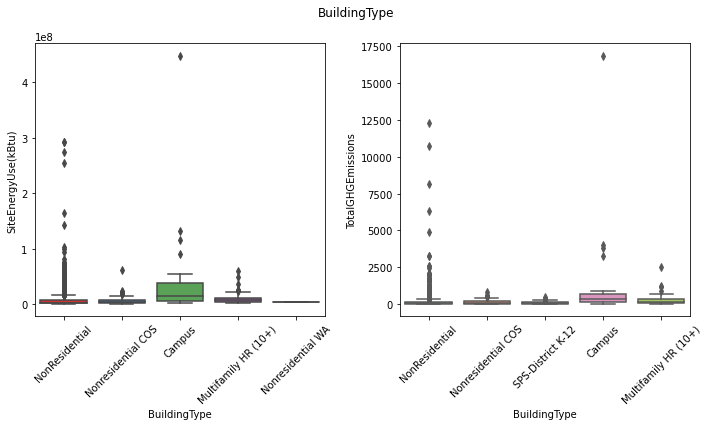

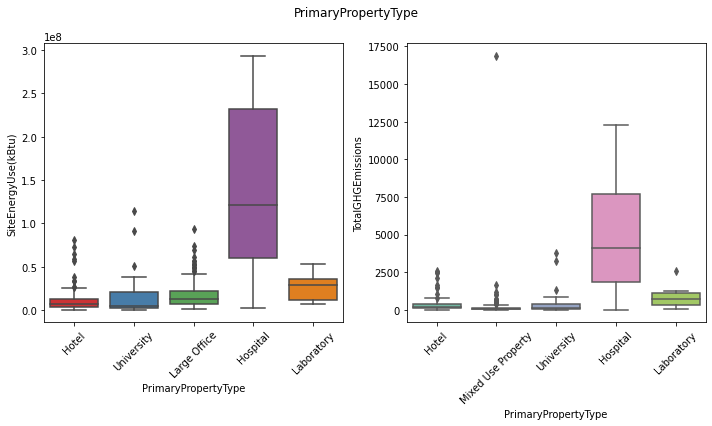

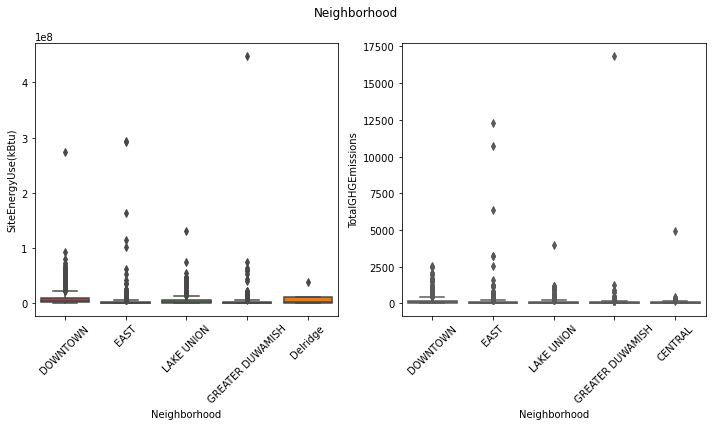

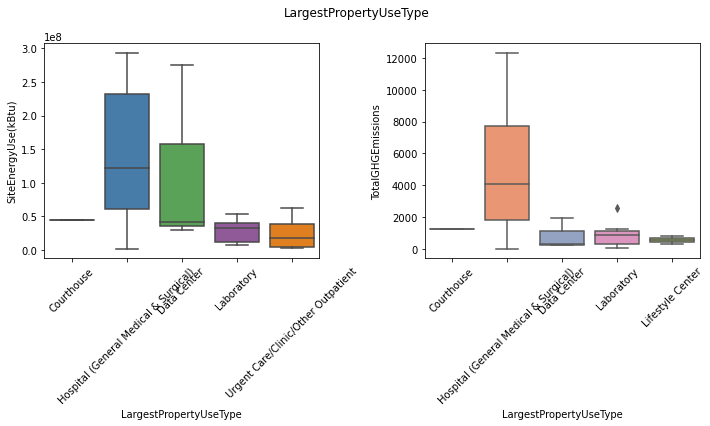

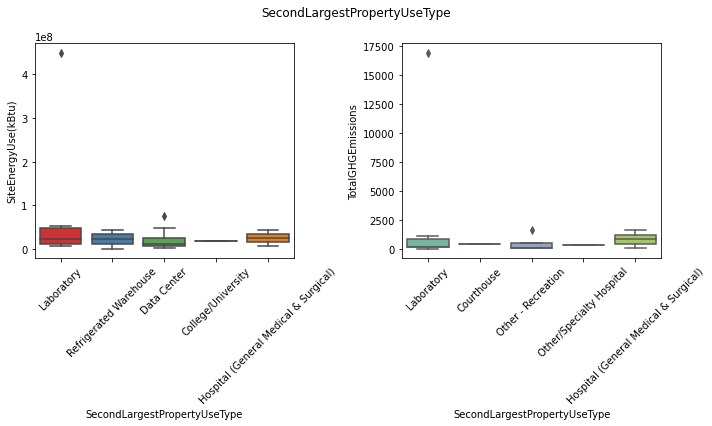

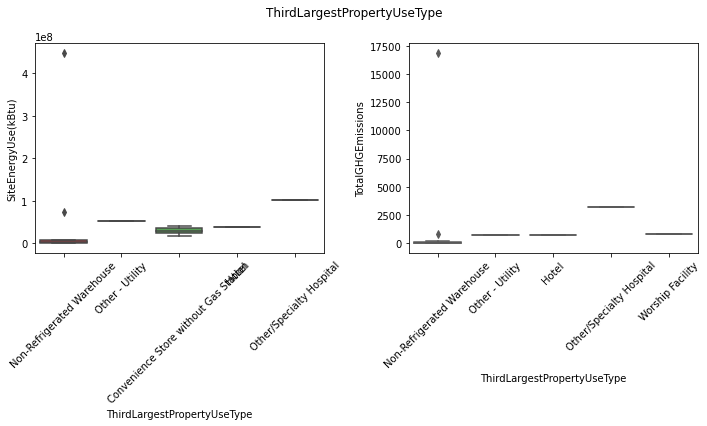

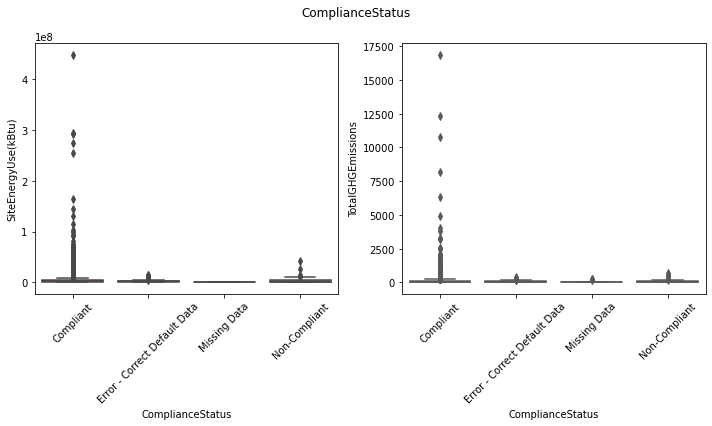

In [52]:
for col in categorical_features:
    subset_conso = df[[col,conso]]
    subset_co2 = df[[col,co2]]
    
    cat_to_keep_conso = df.groupby(by=col).mean()[conso].sort_values(ascending=False)[:5].index
    cat_to_drop_conso = list(np.setdiff1d(subset_conso[col].unique(), cat_to_keep_conso, assume_unique=True))
    
    cat_to_keep_co2 = df.groupby(by=col).mean()[co2].sort_values(ascending=False)[:5].index
    cat_to_drop_co2 = list(np.setdiff1d(subset_co2[col].unique(), cat_to_keep_co2, assume_unique=True))
                       
    for cat in cat_to_drop_conso:
        subset_conso = subset_conso.drop(index=subset_conso[subset_conso[col]==cat].index)
    
    for cat in cat_to_drop_co2:
        subset_co2 = subset_co2.drop(index=subset_co2[subset_co2[col]==cat].index)
    
    fig = plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    plt.suptitle(col)
    ax1 = sns.boxplot(data=subset_conso, x=col, y=conso, palette='Set1')
    plt.xticks(rotation = 45)
    plt.subplot(1,2,2)
    ax2 = sns.boxplot(data=subset_co2, x=col, y=co2, palette='Set2')
    plt.xticks(rotation = 45)
    plt.tight_layout()
    save_fig(f"Distribution des valeurs cibles dans les 5 premières catégories de {col}")
    plt.show()

## Analyse multivariée

In [53]:
#sns.pairplot(df[numerical_features+[conso, co2]])
save_fig("Visualisation des relations paire à paire des variables quantitatives importantes")

<Figure size 432x288 with 0 Axes>

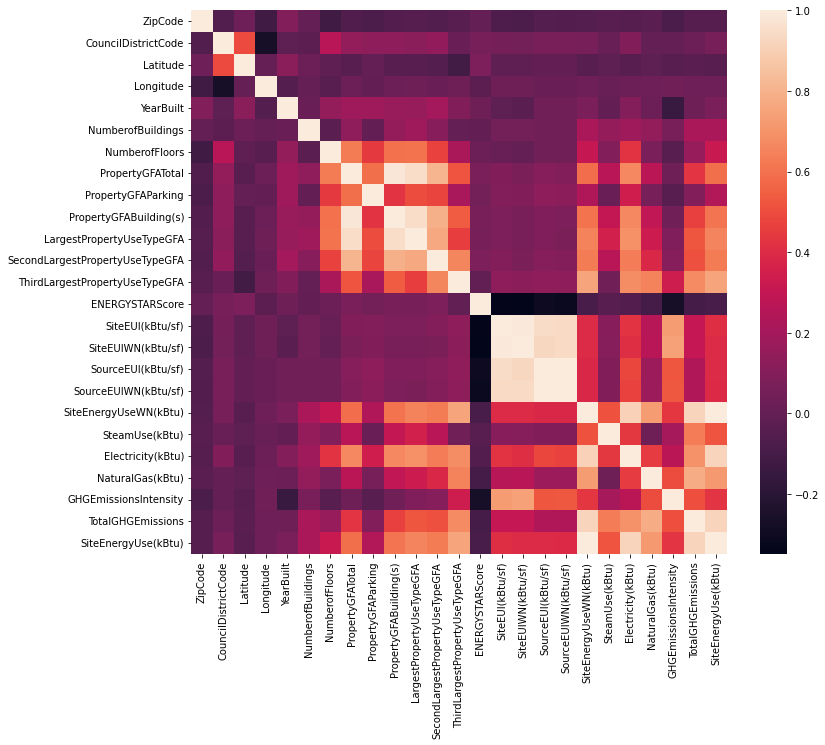

In [54]:
plt.figure(figsize=(12,10))
sns.heatmap(df[numerical_features+[co2,conso]].corr())
save_fig("Matrice de corrélation linéaire des variables quantitatives importantes")

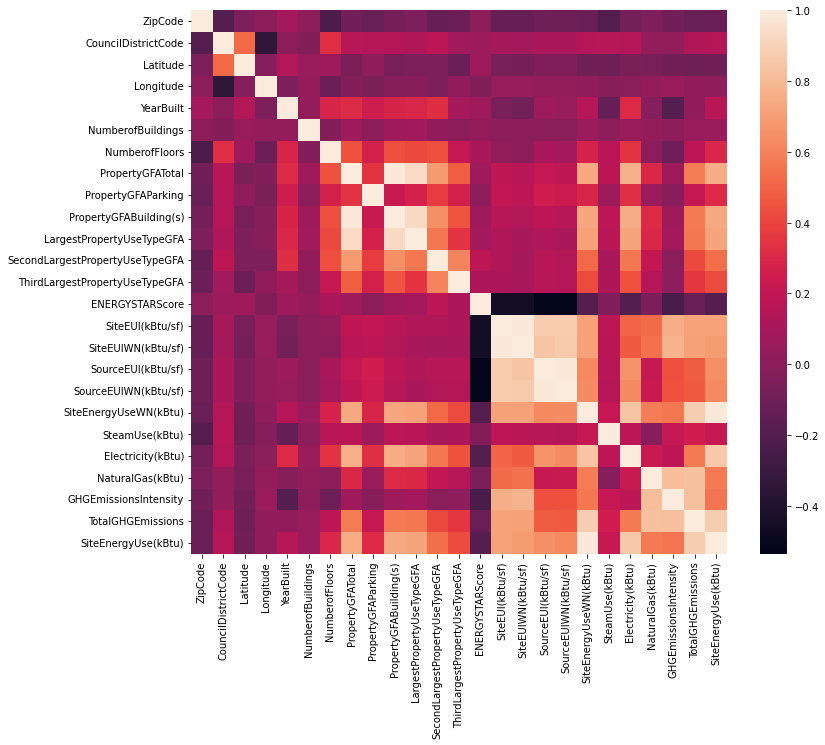

In [55]:
plt.figure(figsize=(12,10))
sns.heatmap(df[numerical_features+[co2,conso]].corr(method='spearman'))
save_fig("Matrice de corrélation de monotonie des variables quantitatives importantes")

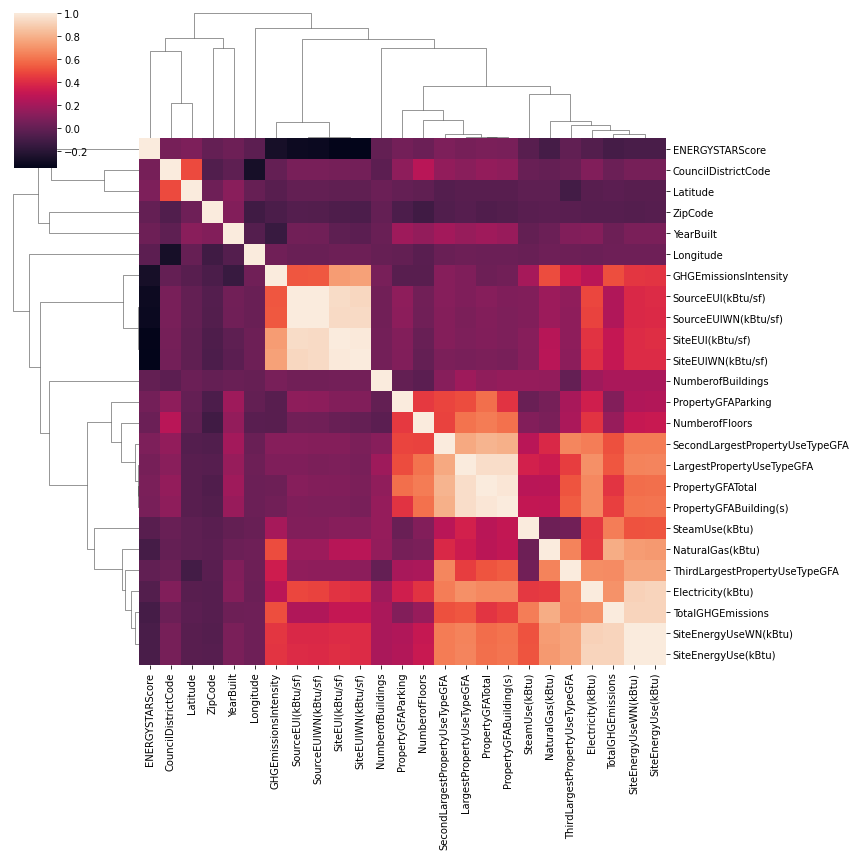

In [56]:
sns.clustermap(df[numerical_features+[conso, co2]].corr(), metric='correlation', figsize=(12,12))
save_fig("Visualisation des clusters de corrélation")

#### Rapport d'analyse multivariée

Les graphiques ci-avant confirment nos observations faites dans le rapport d'analyse bivariée.

Mais nous en apprennons également, énormément plus :

- Nous pouvons distinguer 3 sous-groupes de variables qui semblent particulièrement corrélés : il faudra réfléchir à comment les synthétiser afin de ne pas apporter un jeu de données multicolinéaire à nos modèles de Machine Learning par la suite!

In [57]:
corr_grp_1 = ['GHGEmissionsIntensity','SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)']
corr_grp_2 = ['NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 
              'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA']
corr_grp_3 = ['SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
              'ThirdLargestPropertyUseTypeGFA']
corr_grp_4 = ['SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
                  'ThirdLargestPropertyUseTypeGFA', conso, co2]

corr_grps = [corr_grp_1, corr_grp_2, corr_grp_3, corr_grp_4]

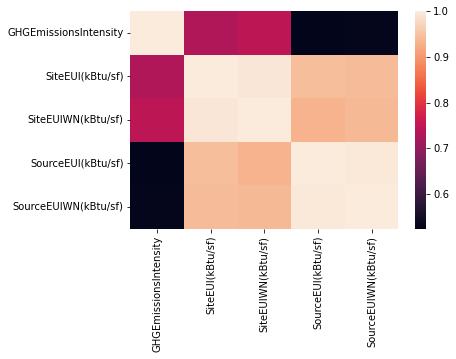

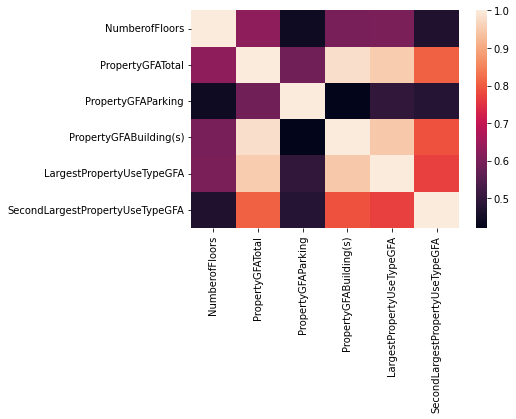

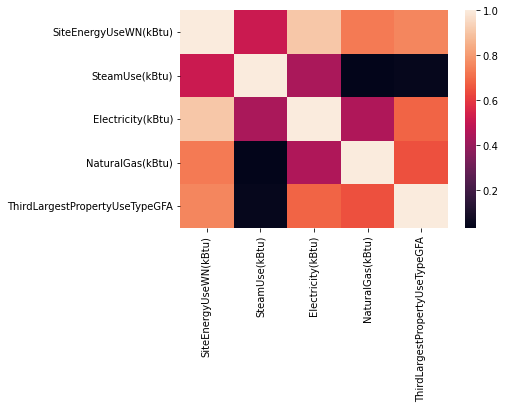

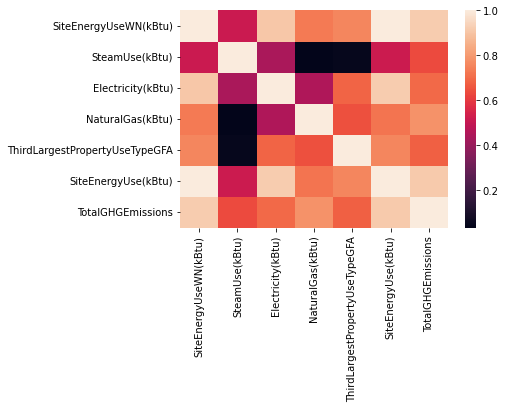

In [58]:
for grp in corr_grps:
    plt.figure()
    sns.heatmap(df[grp].corr())
    save_fig(f"Diagramme de corrélation du cluster n°{1+corr_grps.index(grp)}")

Nous pouvons comprendre :
   1. le premier groupe comme celui des variables de consommation d'énergie ou d'émission de gazs à effet de serre rapportées à la surface
   2. le second groupe comme l'ensemble des variables relatives à la surface/volume des bâtiments
   3. le troisième comme l'ensemble des variables de consommation d'énergie
   4. le quatrième groupe est composé du troisième auquel on ajoute nos 2 valeurs cibles sont très corrrélées à ce dernier
   
Il est également à noter que les variables du groupe 1 sont également fortement corrélées à celles du groupe 3, mais moins fortement que les variables de ces groupes entre elles.


Par ailleurs, et sans surprise, les variables du groupe 1 et 3 sont également corrélées, mais moins fortement que les variables de ces groupes entre elles, et moins que ce qu'on pouvait s'imaginer. En effet, normalement il existe une relation affine entre ces 2 groupes de variables, le coefficient de cette relation étant la valeur de la 'gross floor area'...

Enfin, les variables du groupe 2 et 3 sont également corrélées, mais moins fortement que les variables de ces groupes entre elles.

- <b>Nous constatons que nos 2 variables cibles sont très fortement corrélées linéairement</b> : nous pouvons donc nous poser la question si nous n'avons finalement pas qu'une seule cible plutôt que 2...

In [59]:
df.to_csv("datasets/DF_EDA.csv", index=False)

## Fin de l'analyse exploratoire